In [1]:
!pip install rdkit
!pip install rdkit-pypi


In [2]:
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors, rdFMCS
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
import pandas as pd
import numpy as np


# Загрузка SMILES из файла
xlsx = pd.ExcelFile('All-1614.xlsx')
df=xlsx.parse('Smile-IC50-CC50')
df=df.rename(columns={'Title':'molecule'})
print(df.isnull().sum())
admet_df=xlsx.parse('Structures-ADMET')
print(admet_df.isnull().sum())

full_df = pd.merge(df, admet_df, on=["molecule","SMILES","IC50, mmg/ml","CC50-MDCK, mmg/ml","SI","Pictures"], how='outer')
#smiles_column = full_df['SMILES']
full_df.drop(["Unnamed: 55","Unnamed: 56","Pictures"], axis= 1 , inplace= True)
full_df

molecule                     0
IC50, mmg/ml                 0
CC50-MDCK, mmg/ml            0
SI                           0
Molecular weight             0
Hydrogen bond acceptors      0
Hydrogen bond donors         0
Polar SA                     0
SMILES                       0
Pictures                   886
dtype: int64
molecule                         0
Pictures                       886
SMILES                           0
IC50, mmg/ml                     0
CC50-MDCK, mmg/ml                0
SI                              24
#stars                          67
#amine                          67
#amidine                        67
#acid                           67
#amide                          67
#rotor                          67
#rtvFG                          67
CNS                             67
mol_MW                          67
dipole                          67
SASA                            67
FOSA                            67
FISA                            67
PISA        

,molecule,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,#stars,...,SAfluorine,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm
0,1007-Ya-213,2.7,500.0,185.185185,195.307,2.0,1.0,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,2.0,...,0.000,0.0,35.245,2.0,0.0,0.0,0.0,0.0,0.0,14.0
1,1007-Ya-213,0.7,447.0,638.571429,195.307,2.0,1.0,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,2.0,...,0.000,0.0,35.245,2.0,0.0,0.0,0.0,0.0,0.0,14.0
2,1008-Ya-187,9.9,144.0,14.545455,250.431,1.0,0.0,15.60,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,2.0,...,0.000,0.0,17.981,2.0,0.0,0.0,0.0,0.0,0.0,18.0
3,1009-As-106,8.3,500.0,60.240964,222.377,1.0,0.0,15.60,CN(C)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,3.0,...,0.000,0.0,18.821,2.0,0.0,0.0,0.0,0.0,0.0,16.0
4,1010-Ya-208,39.4,143.0,3.629442,239.361,2.0,0.0,29.54,CN(C)CC(=O)O[C@H]1C[C@H](CC2)C(C)(C)[C@@]12C,1.0,...,0.000,0.0,36.035,3.0,0.0,0.0,0.0,0.0,0.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,6299-KVS-851-1,3.0,95.0,NaN,NaN,NaN,NaN,NaN,c1cccc(O)c1C(=O)\C=C(O)\c2c(F)c(F)c(F)c(F)c2,3.0,...,156.621,0.0,55.368,3.0,0.0,12.0,0.0,12.0,0.0,22.0
1696,6300-KVS-852,2.0,2.0,NaN,NaN,NaN,NaN,NaN,c1cccc(O)c1C(=O)\C=C(O)\c2cc(Br)c(F)cc2,2.0,...,39.772,0.0,56.575,3.0,0.0,12.0,0.0,12.0,0.0,20.0
1697,6301-KVS-853,2.0,32.8,NaN,NaN,NaN,NaN,NaN,c1cccc(O)c1C(=O)\C=C(O)\c2cc(F)c(F)cc2,3.0,...,87.296,0.0,56.575,3.0,0.0,12.0,0.0,12.0,0.0,20.0
1698,6302-KVS-854-1,5.1,14.0,NaN,NaN,NaN,NaN,NaN,c1cccc(O)c1C(=O)\C=C(O)\c2c(OC)c(F)c(F)c(F)c2,2.0,...,105.353,0.0,61.297,4.0,0.0,12.0,0.0,12.0,0.0,23.0


In [3]:
full_df.isnull().sum()

molecule                        0
IC50, mmg/ml                    0
CC50-MDCK, mmg/ml               0
SI                             24
Molecular weight               35
Hydrogen bond acceptors        35
Hydrogen bond donors           35
Polar SA                       35
SMILES                          0
#stars                        102
#amine                        102
#amidine                      102
#acid                         102
#amide                        102
#rotor                        102
#rtvFG                        102
CNS                           102
mol_MW                        102
dipole                        102
SASA                          102
FOSA                          102
FISA                          102
PISA                          102
WPSA                          102
volume                        102
donorHB                       102
accptHB                       102
dip^2/V                       102
ACxDN^.5/SA                   102
glob          

In [4]:
df_cleaned =full_df.dropna(ignore_index=True)
df=df_cleaned
df

,molecule,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,#stars,...,SAfluorine,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm
0,1007-Ya-213,2.700,500.000,185.185185,195.307,2.0,1.0,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,2.0,...,0.000,0.000,35.245,2.0,0.0,0.0,0.0,0.0,0.0,14.0
1,1007-Ya-213,0.700,447.000,638.571429,195.307,2.0,1.0,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,2.0,...,0.000,0.000,35.245,2.0,0.0,0.0,0.0,0.0,0.0,14.0
2,1008-Ya-187,9.900,144.000,14.545455,250.431,1.0,0.0,15.60,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,2.0,...,0.000,0.000,17.981,2.0,0.0,0.0,0.0,0.0,0.0,18.0
3,1009-As-106,8.300,500.000,60.240964,222.377,1.0,0.0,15.60,CN(C)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,3.0,...,0.000,0.000,18.821,2.0,0.0,0.0,0.0,0.0,0.0,16.0
4,1010-Ya-208,39.400,143.000,3.629442,239.361,2.0,0.0,29.54,CN(C)CC(=O)O[C@H]1C[C@H](CC2)C(C)(C)[C@@]12C,1.0,...,0.000,0.000,36.035,3.0,0.0,0.0,0.0,0.0,0.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1564,CHEMBL5180810,2.984,33.711,11.297252,441.364,7.0,4.0,127.53,c1c(O)c(O)cc(c12)C[C@@H](C(=O)OC)N(C(=O)C(F)(F...,0.0,...,96.381,27.454,141.131,8.0,0.0,16.0,0.0,16.0,3.0,31.0
1565,CHEMBL5182912,2.964,38.739,13.069838,387.393,7.0,4.0,127.53,c1c(O)c(O)cc(c12)C[C@@H](C(=O)OC)N(C(=O)C)[C@H...,0.0,...,0.000,28.787,148.623,8.0,0.0,16.0,0.0,16.0,3.0,28.0
1566,CHEMBL5187879,2.628,37.336,14.207002,373.366,7.0,4.0,127.53,c1c(O)c(O)cc(c12)C[C@@H](C(=O)OC)N(C=O)[C@H]2C...,0.0,...,0.000,31.661,149.675,8.0,0.0,16.0,0.0,16.0,3.0,27.0
1567,CHEMBL5208658,7.187,35.933,4.999722,359.339,5.0,4.0,138.53,c1c(O)c(O)cc(c12)C[C@@H](C(=O)O)N(C=O)[C@H]2Cc...,0.0,...,0.000,25.418,166.916,8.0,0.0,16.0,0.0,16.0,3.0,26.0


In [5]:
smiles_column = df['SMILES']

In [6]:
df.dtypes

molecule                       object
IC50, mmg/ml                  float64
CC50-MDCK, mmg/ml             float64
SI                            float64
Molecular weight              float64
Hydrogen bond acceptors       float64
Hydrogen bond donors          float64
Polar SA                      float64
SMILES                         object
#stars                        float64
#amine                        float64
#amidine                      float64
#acid                         float64
#amide                        float64
#rotor                        float64
#rtvFG                        float64
CNS                           float64
mol_MW                        float64
dipole                        float64
SASA                          float64
FOSA                          float64
FISA                          float64
PISA                          float64
WPSA                          float64
volume                        float64
donorHB                       float64
accptHB     

In [7]:
def calculate_similarity(smiles1, smiles2):
    mol1 = Chem.MolFromSmiles(smiles1)
    mol2 = Chem.MolFromSmiles(smiles2)
    fp1 = FingerprintMols.FingerprintMol(mol1)
    fp2 = FingerprintMols.FingerprintMol(mol2)
    return DataStructs.TanimotoSimilarity(fp1, fp2)

Ищем похожие соединения для уже существующих веществ

In [8]:
target_smiles_Oseltamivir = "CCC(CC)OC1C=C(CC(C1NC(=O)C)N)C(=O)OCC"

In [9]:
similar_smiles = []
for smiles in smiles_column:
    similarity = calculate_similarity(smiles, target_smiles_Oseltamivir)

    # Определите порог сходства
    if similarity >0.5:
        similar_smiles.append(smiles)

# Выведите список похожих SMILES
selected_rows_Oseltamivir = df[df['SMILES'].isin(similar_smiles)]
selected_rows_Oseltamivir


,molecule,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,#stars,...,SAfluorine,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm
763,CHEMBL674,0.825,28.436,34.467879,284.358,2.0,1.0,101.65,CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C(=O)O)OC(C...,0.0,...,0.0,32.007,117.229,6.0,0.0,6.0,0.0,6.0,4.0,20.0
766,CHEMBL674,0.398,28.436,71.447236,284.358,2.0,1.0,101.65,CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C(=O)O)OC(C...,0.0,...,0.0,32.007,117.229,6.0,0.0,6.0,0.0,6.0,4.0,20.0
785,CHEMBL1229,0.034,0.250,7.352941,312.413,4.0,1.0,90.65,CC(=O)N[C@H]([C@H](C1)N)[C@H](OC(CC)CC)C=C1C(=...,0.0,...,0.0,28.786,97.819,6.0,0.0,6.0,0.0,6.0,4.0,22.0
786,CHEMBL1229,0.937,0.250,0.266809,312.413,4.0,1.0,90.65,CC(=O)N[C@H]([C@H](C1)N)[C@H](OC(CC)CC)C=C1C(=...,0.0,...,0.0,28.786,97.819,6.0,0.0,6.0,0.0,6.0,4.0,22.0
787,CHEMBL1229,9.060,0.250,0.027594,312.413,4.0,1.0,90.65,CC(=O)N[C@H]([C@H](C1)N)[C@H](OC(CC)CC)C=C1C(=...,0.0,...,0.0,28.786,97.819,6.0,0.0,6.0,0.0,6.0,4.0,22.0
788,CHEMBL1229,0.469,0.250,0.533049,312.413,4.0,1.0,90.65,CC(=O)N[C@H]([C@H](C1)N)[C@H](OC(CC)CC)C=C1C(=...,0.0,...,0.0,28.786,97.819,6.0,0.0,6.0,0.0,6.0,4.0,22.0
789,CHEMBL1229,4.999,0.219,0.043809,312.413,4.0,1.0,90.65,CC(=O)N[C@H]([C@H](C1)N)[C@H](OC(CC)CC)C=C1C(=...,0.0,...,0.0,28.786,97.819,6.0,0.0,6.0,0.0,6.0,4.0,22.0
790,CHEMBL1229,6.561,0.219,0.033379,312.413,4.0,1.0,90.65,CC(=O)N[C@H]([C@H](C1)N)[C@H](OC(CC)CC)C=C1C(=...,0.0,...,0.0,28.786,97.819,6.0,0.0,6.0,0.0,6.0,4.0,22.0
940,CHEMBL1200340,0.747,41.040,54.939759,312.413,4.0,1.0,90.65,CC(=O)N[C@H]([C@H](C1)N)[C@H](OC(CC)CC)C=C1C(=...,0.0,...,0.0,27.810,98.675,6.0,0.0,6.0,0.0,6.0,4.0,22.0
947,CHEMBL4077568,0.014,0.382,27.285714,382.464,4.0,2.0,140.61,CCC(=O)N/C(=N/[H])N[C@@H](C1)[C@@H](NC(=O)C)[C...,0.0,...,0.0,36.144,172.172,9.0,0.0,6.0,0.0,6.0,4.0,27.0


In [10]:
target_smiles_Zanamivir="CC(=O)NC1C(C=C(OC1C(C(CO)O)O)C(=O)O)N=C(N)N"


In [11]:
similar_smiles = []
for smiles in smiles_column:
    similarity = calculate_similarity(smiles, target_smiles_Zanamivir)

    # Определите порог сходства
    if similarity >0.5:
        similar_smiles.append(smiles)

# Выведите список похожих SMILES
selected_rows_Zanamivir = df[df['SMILES'].isin(similar_smiles)]
selected_rows_Zanamivir

,molecule,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,#stars,...,SAfluorine,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm
2,1008-Ya-187,9.900,144.000,14.545455,250.431,1.0,0.0,15.60,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,2.0,...,0.0,0.000,17.981,2.0,0.0,0.0,0.0,0.0,0.0,18.0
31,1082-1008-Ya-187,6.100,201.700,33.065574,250.431,1.0,0.0,15.60,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,2.0,...,0.0,0.000,17.981,2.0,0.0,0.0,0.0,0.0,0.0,18.0
41,1381-Ya-266,0.700,62.000,88.571429,358.572,3.0,1.0,44.95,CC1(C)[C@H](CC2)CC(\[C@]12C)=N/CC(O)C\N=C(\[C@...,4.0,...,0.0,0.000,47.284,3.0,1.0,0.0,0.0,0.0,0.0,26.0
119,1563-Ya-371-13,8.400,111.000,13.214286,320.566,1.0,0.0,15.60,CCCCN(CCCC)CCC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,3.0,...,0.0,0.000,17.981,2.0,1.0,0.0,0.0,0.0,0.0,23.0
122,1569-Ya-372-10,12.900,300.000,23.255814,233.400,1.0,0.0,12.36,C[C@@]12C(C)(C)[C@H](CC2)CC\1=N/C3CCCCC3,5.0,...,0.0,0.000,10.985,1.0,0.0,6.0,0.0,6.0,6.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,CHEMBL4283912,13.719,177.020,12.903273,885.115,13.0,4.0,213.09,CC(=O)OC[C@@H](OC(=O)C)[C@@H](OC(=O)C)[C@H](O1...,9.0,...,0.0,19.749,218.267,15.0,2.0,28.0,0.0,28.0,23.0,63.0
1121,CHEMBL4294489,16.687,118.112,7.078085,869.115,12.0,3.0,192.86,CC(=O)OC[C@@H](OC(=O)C)[C@@H](OC(=O)C)[C@H](O1...,11.0,...,0.0,39.379,215.088,14.0,2.0,28.0,0.0,28.0,23.0,62.0
1122,CHEMBL4287269,7.214,163.480,22.661492,869.115,12.0,3.0,192.86,CC(=O)OC[C@@H](OC(=O)C)[C@@H](OC(=O)C)[C@H](O1...,10.0,...,0.0,38.456,219.277,14.0,3.0,28.0,0.0,28.0,23.0,62.0
1126,CHEMBL4761569,10.000,14.900,1.490000,758.325,1.0,1.0,12.47,CCCCCCCCCCCC[N+]12CC[N+](CC1)(CC2)CCN(CCCCCOCC...,16.0,...,0.0,0.000,9.450,6.0,2.0,16.0,0.0,16.0,16.0,54.0


In [12]:
target_smiles_Baloxavir_Marboxil="COC(=O)OCOC1=C2C(=O)N3CCOCC3N(N2C=CC1=O)C4C5=C(CSC6=CC=CC=C46)C(=C(C=C5)F)F"

In [13]:
similar_smiles = []
for smiles in smiles_column:
    similarity = calculate_similarity(smiles,target_smiles_Baloxavir_Marboxil )

    # Определите порог сходства
    if similarity >0.5:
        similar_smiles.append(smiles)

# Выведите список похожих SMILES
selected_rows_Baloxavir_Marboxil = df[df['SMILES'].isin(similar_smiles)]
selected_rows_Baloxavir_Marboxil

,molecule,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,#stars,...,SAfluorine,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm
12,1035-DS-80-1,11.000,9.400,0.854545,520.590,6.0,2.0,93.81,c1ccccc1\C=C\C(=O)c(c(O)c(C)c2OC)c(c2[C@]34C)O...,1.0,...,0.0,0.000,80.553,7.0,2.0,32.0,0.0,32.0,4.0,39.0
13,1036-DS-80-2,33.000,30.000,0.909091,520.590,6.0,2.0,93.81,c1ccccc1\C=C\C(=O)c(c(O)c(C)c2OC)c(c2[C@@]34C)...,2.0,...,0.0,0.000,79.388,7.0,2.0,31.0,0.0,28.0,2.0,39.0
14,1037-DS-86-1,33.000,43.900,1.330303,555.035,6.0,2.0,93.81,c1cc(Cl)ccc1\C=C\C(=O)c(c(O)c(C)c2OC)c(c2[C@]3...,2.0,...,0.0,0.000,80.553,7.0,2.0,32.0,0.0,32.0,4.0,40.0
15,1038-DS-86-2,33.000,44.900,1.360606,555.035,6.0,2.0,93.81,c1cc(Cl)ccc1\C=C\C(=O)c(c(O)c(C)c2OC)c(c2[C@@]...,4.0,...,0.0,0.000,79.388,7.0,2.0,31.0,0.0,28.0,2.0,40.0
16,1039-DS-101-1,9.500,330.000,34.736842,550.617,7.0,2.0,103.04,c1cccc(OC)c1\C=C\C(=O)c(c(O)c(C)c2OC)c(c2[C@]3...,1.0,...,0.0,0.000,79.070,8.0,2.0,32.0,0.0,32.0,4.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,CHEMBL474659,100.000,107.500,1.075000,904.791,25.0,15.0,407.50,O[C@@H]1CO[C@@H]([C@H](O)[C@H]1O)O[C@@H]([C@@H...,16.0,...,0.0,0.000,382.259,25.0,3.0,40.0,0.0,40.0,20.0,63.0
1549,CHEMBL5199627,1.296,12.492,9.638889,504.328,7.0,4.0,127.53,Clc1cccc(Cl)c1OC(=O)[C@H](Cc(c23)cc(O)c(c2)O)N...,0.0,...,0.0,18.364,141.490,8.0,1.0,22.0,0.0,22.0,3.0,34.0
1550,CHEMBL5176120,1.896,10.808,5.700422,504.328,7.0,4.0,127.53,c1cc(Cl)cc(Cl)c1OC(=O)[C@H](Cc(c23)cc(O)c(c2)O...,0.0,...,0.0,19.641,143.312,8.0,1.0,22.0,0.0,22.0,3.0,34.0
1555,CHEMBL5173626,1.651,29.394,17.803755,514.338,7.0,4.0,127.53,c1cccc(Br)c1OC(=O)[C@H](Cc(c23)cc(O)c(c2)O)N(C...,0.0,...,0.0,21.835,141.695,8.0,1.0,22.0,0.0,22.0,3.0,33.0


In [14]:
target_smiles_Peramivir="CCC(CC)C(C1C(CC(C1O)C(=O)O)N=C(N)N)NC(=O)C"

In [15]:
similar_smiles = []
for smiles in smiles_column:
    similarity = calculate_similarity(smiles,target_smiles_Peramivir )

    # Определите порог сходства
    if similarity >0.5:
        similar_smiles.append(smiles)

# Выведите список похожих SMILES
selected_rows_Peramivir = df[df['SMILES'].isin(similar_smiles)]
selected_rows_Peramivir

,molecule,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,#stars,...,SAfluorine,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm
50,1390-Ya-270,8.100,277.000,34.197531,195.307,1.0,1.0,29.10,CC(=O)N[C@H]1C[C@H](CC2)C(C)(C)[C@@]12C,2.0,...,0.0,35.881,32.746,2.0,0.0,7.0,0.0,7.0,7.0,14.0
236,2360-Ya-504,42.700,300.000,7.025761,195.307,1.0,1.0,29.10,CC(=O)N[C@H]1C[C@H](CC2)C(C)(C)[C@@]12C,2.0,...,0.0,35.881,32.746,2.0,0.0,7.0,0.0,7.0,7.0,14.0
239,2364-Ya-503,100.000,300.000,3.000000,211.372,0.0,1.0,44.12,CC(=S)N[C@H]1C[C@H](CC2)C(C)(C)[C@@]12C,2.0,...,0.0,0.000,13.247,1.0,0.0,7.0,0.0,7.0,7.0,14.0
289,2604-Ya-523,5.000,300.000,60.000000,263.427,1.0,1.0,29.10,CC(=O)N[C@@H]1[C@](C)(CCC2)[C@@H]([C@H]3[C@@]1...,2.0,...,0.0,44.887,34.764,2.0,0.0,16.0,8.0,8.0,12.0,19.0
315,2740-Ya-543,14.000,300.000,21.428571,182.221,3.0,0.0,43.37,C[C@@]12C(C)(C)[C@@H](CC1)C(=O)OC2=O,2.0,...,0.0,0.000,62.123,3.0,0.0,8.0,0.0,8.0,5.0,13.0
797,CHEMBL2203572,23.541,23.541,1.000000,235.416,0.0,0.0,26.02,CCCC([C@@]12N)(CCC)[C@H]3C[C@@H](C2)C[C@@H](C1)C3,4.0,...,0.0,0.000,18.373,1.0,0.0,10.0,0.0,10.0,10.0,17.0
798,CHEMBL2203572,23.541,23.541,1.000000,235.416,0.0,0.0,26.02,CCCC([C@@]12N)(CCC)[C@H]3C[C@@H](C2)C[C@@H](C1)C3,4.0,...,0.0,0.000,18.373,1.0,0.0,10.0,0.0,10.0,10.0,17.0
799,CHEMBL2203572,23.541,23.541,1.000000,235.416,0.0,0.0,26.02,CCCC([C@@]12N)(CCC)[C@H]3C[C@@H](C2)C[C@@H](C1)C3,4.0,...,0.0,0.000,18.373,1.0,0.0,10.0,0.0,10.0,10.0,17.0
800,CHEMBL2203572,23.541,23.541,1.000000,235.416,0.0,0.0,26.02,CCCC([C@@]12N)(CCC)[C@H]3C[C@@H](C2)C[C@@H](C1)C3,4.0,...,0.0,0.000,18.373,1.0,0.0,10.0,0.0,10.0,10.0,17.0
801,CHEMBL2203572,23.541,23.541,1.000000,235.416,0.0,0.0,26.02,CCCC([C@@]12N)(CCC)[C@H]3C[C@@H](C2)C[C@@H](C1)C3,4.0,...,0.0,0.000,18.373,1.0,0.0,10.0,0.0,10.0,10.0,17.0


In [16]:
target_smiles_Amantadine="C1C2CC3CC1CC(C2)(C3)N"

In [17]:
similar_smiles = []
for smiles in smiles_column:
    similarity = calculate_similarity(smiles,target_smiles_Amantadine )

    # Определите порог сходства
    if similarity >0.5:
        similar_smiles.append(smiles)

# Выведите список похожих SMILES
selected_rows_Amantadine = df[df['SMILES'].isin(similar_smiles)]
selected_rows_Amantadine

,molecule,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,#stars,...,SAfluorine,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm
90,1483-As-190,4.000,63.000,15.750000,153.270,0.0,0.0,26.02,C[C@@]12C(C)(C)[C@H](CC2)C[C@@H]1N,3.0,...,0.0,0.0,22.716,1.0,0.0,7.0,0.0,7.0,7.0,11.0
91,1483-As-190,4.000,63.000,15.750000,153.270,0.0,0.0,26.02,C[C@@]12C(C)(C)[C@H](CC2)C[C@@H]1N,3.0,...,0.0,0.0,22.716,1.0,0.0,7.0,0.0,7.0,7.0,11.0
609,858-AmAd,9.700,42.900,4.422680,151.254,0.0,0.0,26.02,NC12C[C@@H]3C[C@H](C1)C[C@H](C2)C3,5.0,...,0.0,0.0,24.618,1.0,0.0,10.0,0.0,10.0,10.0,11.0
610,859-AmAd,45.900,37.000,0.806100,151.254,0.0,0.0,26.02,[C@H]12[C@H](N)[C@H]3C[C@@H](C2)C[C@@H](C1)C3,4.0,...,0.0,0.0,22.154,1.0,0.0,10.0,0.0,10.0,10.0,11.0
764,CHEMBL959,7.890,35.862,4.545247,179.308,0.0,0.0,26.02,C[C@H](N)C12C[C@@H]3C[C@H](C1)C[C@H](C2)C3,2.0,...,0.0,0.0,22.409,1.0,0.0,10.0,0.0,10.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,CHEMBL959,12.014,60.105,5.002913,179.308,0.0,0.0,26.02,C[C@H](N)C12C[C@@H]3C[C@H](C1)C[C@H](C2)C3,2.0,...,0.0,0.0,22.409,1.0,0.0,10.0,0.0,10.0,10.0,13.0
1294,CHEMBL3236446,36.651,222.471,6.069984,139.243,0.0,0.0,26.02,C[C@@H](N)[C@H]([C@H]12)C[C@@H](C1)CC2,3.0,...,0.0,0.0,24.152,1.0,0.0,7.0,0.0,7.0,7.0,10.0
1295,CHEMBL660,9.710,42.970,4.425335,151.254,0.0,0.0,26.02,NC12C[C@@H]3C[C@H](C1)C[C@H](C2)C3,6.0,...,0.0,0.0,24.357,1.0,0.0,10.0,0.0,10.0,10.0,11.0
1320,CHEMBL959,12.910,57.182,4.429280,179.308,0.0,0.0,26.02,C[C@H](N)C12C[C@@H]3C[C@H](C1)C[C@H](C2)C3,2.0,...,0.0,0.0,22.409,1.0,0.0,10.0,0.0,10.0,10.0,13.0


In [18]:
target_smiles_Rimantadine="CC(C12CC3CC(C1)CC(C3)C2)N"

In [19]:
similar_smiles = []
for smiles in smiles_column:
    similarity = calculate_similarity(smiles,target_smiles_Rimantadine)

    # Определите порог сходства
    if similarity >0.5:
        similar_smiles.append(smiles)

# Выведите список похожих SMILES
selected_rows_Rimantadine = df[df['SMILES'].isin(similar_smiles)]
selected_rows_Rimantadine

,molecule,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,#stars,...,SAfluorine,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm
19,1068-As-109,16.500,500.000,30.303030,197.323,1.0,1.0,32.26,OCCN[C@H]1C[C@H](CC2)C(C)(C)[C@@]12C,1.0,...,0.0,0.0,30.207,2.0,0.0,0.0,0.0,0.0,0.0,14.0
20,1068-As-109,16.500,500.000,30.303030,197.323,1.0,1.0,32.26,OCCN[C@H]1C[C@H](CC2)C(C)(C)[C@@]12C,1.0,...,0.0,0.0,30.207,2.0,0.0,0.0,0.0,0.0,0.0,14.0
37,1377-AS-131-14,2.000,65.900,32.950000,211.350,1.0,1.0,32.26,OCCCN[C@H]1C[C@@H](CC2)C(C)(C)[C@]12C,1.0,...,0.0,0.0,34.056,2.0,0.0,7.0,0.0,7.0,7.0,15.0
40,1380-AS-136,3.400,72.900,21.441176,239.404,1.0,1.0,32.26,OCCCCCN[C@H]1C[C@@H](CC2)C(C)(C)[C@]12C,1.0,...,0.0,0.0,34.055,2.0,0.0,7.0,0.0,7.0,7.0,17.0
90,1483-As-190,4.000,63.000,15.750000,153.270,0.0,0.0,26.02,C[C@@]12C(C)(C)[C@H](CC2)C[C@@H]1N,3.0,...,0.0,0.0,22.716,1.0,0.0,7.0,0.0,7.0,7.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,CHEMBL959,12.014,60.105,5.002913,179.308,0.0,0.0,26.02,C[C@H](N)C12C[C@@H]3C[C@H](C1)C[C@H](C2)C3,2.0,...,0.0,0.0,22.409,1.0,0.0,10.0,0.0,10.0,10.0,13.0
1294,CHEMBL3236446,36.651,222.471,6.069984,139.243,0.0,0.0,26.02,C[C@@H](N)[C@H]([C@H]12)C[C@@H](C1)CC2,3.0,...,0.0,0.0,24.152,1.0,0.0,7.0,0.0,7.0,7.0,10.0
1295,CHEMBL660,9.710,42.970,4.425335,151.254,0.0,0.0,26.02,NC12C[C@@H]3C[C@H](C1)C[C@H](C2)C3,6.0,...,0.0,0.0,24.357,1.0,0.0,10.0,0.0,10.0,10.0,11.0
1320,CHEMBL959,12.910,57.182,4.429280,179.308,0.0,0.0,26.02,C[C@H](N)C12C[C@@H]3C[C@H](C1)C[C@H](C2)C3,2.0,...,0.0,0.0,22.409,1.0,0.0,10.0,0.0,10.0,10.0,13.0


Объедим уже полученные данные

In [20]:
merged_df = pd.concat([selected_rows_Oseltamivir,selected_rows_Zanamivir,selected_rows_Baloxavir_Marboxil,selected_rows_Amantadine,selected_rows_Rimantadine]).drop_duplicates()
merged_df=merged_df.rename(columns={'Title':'molecule'})
merged_df=merged_df.reset_index(drop=True)
for_class=merged_df
merged_df

,molecule,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,#stars,...,SAfluorine,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm
0,CHEMBL674,0.825,28.436,34.467879,284.358,2.0,1.0,101.65,CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C(=O)O)OC(C...,0.0,...,0.0,32.007,117.229,6.0,0.0,6.0,0.0,6.0,4.0,20.0
1,CHEMBL674,0.398,28.436,71.447236,284.358,2.0,1.0,101.65,CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C(=O)O)OC(C...,0.0,...,0.0,32.007,117.229,6.0,0.0,6.0,0.0,6.0,4.0,20.0
2,CHEMBL1229,0.034,0.250,7.352941,312.413,4.0,1.0,90.65,CC(=O)N[C@H]([C@H](C1)N)[C@H](OC(CC)CC)C=C1C(=...,0.0,...,0.0,28.786,97.819,6.0,0.0,6.0,0.0,6.0,4.0,22.0
3,CHEMBL1229,0.937,0.250,0.266809,312.413,4.0,1.0,90.65,CC(=O)N[C@H]([C@H](C1)N)[C@H](OC(CC)CC)C=C1C(=...,0.0,...,0.0,28.786,97.819,6.0,0.0,6.0,0.0,6.0,4.0,22.0
4,CHEMBL1229,9.060,0.250,0.027594,312.413,4.0,1.0,90.65,CC(=O)N[C@H]([C@H](C1)N)[C@H](OC(CC)CC)C=C1C(=...,0.0,...,0.0,28.786,97.819,6.0,0.0,6.0,0.0,6.0,4.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,1068-As-109,16.500,500.000,30.303030,197.323,1.0,1.0,32.26,OCCN[C@H]1C[C@H](CC2)C(C)(C)[C@@]12C,1.0,...,0.0,0.000,30.207,2.0,0.0,0.0,0.0,0.0,0.0,14.0
419,1377-AS-131-14,2.000,65.900,32.950000,211.350,1.0,1.0,32.26,OCCCN[C@H]1C[C@@H](CC2)C(C)(C)[C@]12C,1.0,...,0.0,0.000,34.056,2.0,0.0,7.0,0.0,7.0,7.0,15.0
420,1380-AS-136,3.400,72.900,21.441176,239.404,1.0,1.0,32.26,OCCCCCN[C@H]1C[C@@H](CC2)C(C)(C)[C@]12C,1.0,...,0.0,0.000,34.055,2.0,0.0,7.0,0.0,7.0,7.0,17.0
421,840-Ya-106,0.300,2.100,7.000000,388.686,0.0,0.0,24.06,C[C@]12C(C)(C)[C@@H](CC2)C[C@@H]1NCCCCCCN[C@@H...,6.0,...,0.0,0.000,14.878,2.0,1.0,0.0,0.0,0.0,0.0,28.0


Был проанализирован датасет и теперь будем готовить датасет для обученя

In [21]:
merged_df['Recommendation'] = np.where(merged_df['SI']>10, 0, 1)
merged_df = merged_df.sample(frac=1)
merged_df=merged_df.reset_index(drop=True)
merged_df

,molecule,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,#stars,...,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm,Recommendation
0,CHEMBL4205111,38.652,96.630,2.500000,386.517,3.0,3.0,106.67,C1CCCCc(c12)sc(c2C(=O)NC(C)(C)C)NC(=O)c3c(O)cccc3,0.0,...,0.000,81.596,5.0,0.0,16.0,0.0,11.0,5.0,27.0,1
1,5873-LFC-AMA-003-1,27.400,300.000,10.948905,578.511,13.0,0.0,188.58,COc(cc1)ccc1-c(c(c2=O)C(=O)OC)oc(c23)c(-n4cncn...,1.0,...,0.000,171.751,17.0,2.0,36.0,0.0,36.0,0.0,43.0,0
2,CHEMBL19844,6.027,30.134,4.999834,301.345,4.0,4.0,84.16,c1cc(O)c(O)cc1C[C@H]2N(C)CCc(c23)cc(O)c(c3)O,0.0,...,0.000,92.416,5.0,0.0,16.0,0.0,16.0,3.0,22.0,1
3,CHEMBL2203571,0.249,20.736,83.277108,207.362,0.0,0.0,26.02,CCC(CC)([C@@]12N)[C@H]3C[C@@H](C2)C[C@@H](C1)C3,4.0,...,0.000,18.096,1.0,0.0,10.0,0.0,10.0,10.0,15.0,0
4,CHEMBL4213962,36.251,61.963,1.709277,421.522,4.0,2.0,108.56,n1ccccc1NC(=O)c2c(sc(c23)CCCCC3)NC(=O)c4c(OC)c...,0.0,...,0.000,82.826,6.0,0.0,22.0,0.0,17.0,5.0,30.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,CHEMBL4074939,0.004,0.495,123.750000,494.596,4.0,2.0,140.61,c1cccc(c12)ccc(c2)CC(=O)N/C(=N\[H])N[C@@H](C3)...,0.0,...,32.534,157.068,9.0,0.0,16.0,0.0,16.0,4.0,36.0,0
419,CHEMBL2335952,35.676,71.466,2.003195,282.255,5.0,0.0,61.83,c1ccc(OC)c(O2)c1C(=O)[C@@]23c4c(C(=O)O3)cccc4,0.0,...,0.000,84.827,5.0,0.0,17.0,0.0,17.0,1.0,21.0,1
420,6852_ZV-067,7.100,300.000,42.253521,400.503,3.0,0.0,70.67,c1ccccc1C(=O)c2c(-c3ccccc3)nc(s2)N(C4)C[C@H]([...,0.0,...,0.000,46.565,4.0,1.0,27.0,0.0,27.0,6.0,29.0,0
421,CHEMBL2335937,7.402,100.137,13.528371,266.256,4.0,0.0,52.60,c1cc(C)cc(O2)c1C(=O)[C@@]23c4c(C(=O)O3)cccc4,0.0,...,0.000,78.623,4.0,0.0,17.0,0.0,17.0,1.0,20.0,0


In [22]:
merged_df = pd.concat([merged_df, merged_df[merged_df['Recommendation'] == 0]])

In [23]:
merged_df = merged_df.sample(frac=1)
merged_df=merged_df.reset_index(drop=True)
merged_df

,molecule,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,#stars,...,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm,Recommendation
0,M-1-5fd-S,4.903402,10.50729,2.142857,700.486,3.0,0.0,43.37,FC(F)(F)c1cc(ccc1)\C=C\C(=O)c(c(F)c(F)c2F)c(c2...,5.0,...,0.000,54.355,3.0,1.0,28.0,0.0,28.0,1.0,49.0,1
1,6911_ZV-109,123.000000,300.00000,2.439024,406.306,3.0,0.0,74.85,c1csc(c1C)[C@@H](OC(=O)C2)[C@@H]([C@@H]23)CN(C...,0.0,...,0.000,65.102,4.0,0.0,20.0,0.0,20.0,5.0,24.0,1
2,6626_ZV-012,14.200000,89.50000,6.302817,472.567,2.0,0.0,106.16,Cc(c1)sc(c12)C[C@@H]3[C@H]([C@H]2C(=O)O)C(=O)N...,0.0,...,0.000,90.879,6.0,0.0,26.0,0.0,26.0,5.0,34.0,1
3,CHEMBL4074939,0.006000,0.49500,82.500000,494.596,4.0,2.0,140.61,c1cccc(c12)ccc(c2)CC(=O)N/C(=N\[H])N[C@@H](C3)...,0.0,...,32.534,157.068,9.0,0.0,16.0,0.0,16.0,4.0,36.0,0
4,CHEMBL3785705,9.010000,9.41500,1.044950,450.490,9.0,3.0,143.50,O=c1oc(C)c(C)c(O2)c1[C@H](OC)[C@@H]([C@]23C)[C...,0.0,...,0.000,125.363,9.0,0.0,18.0,0.0,18.0,9.0,32.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,CHEMBL2011758,0.645000,11.20400,17.370543,304.458,2.0,2.0,73.39,C1[C@@H](O)CC(C)(C)C[C@@]1(C)CNc(n2)sc(c23)cccc3,1.0,...,0.000,38.670,3.0,0.0,15.0,0.0,15.0,6.0,21.0,0
563,4771-LFC-KVS-719-1,6.200000,27.00000,4.354839,460.370,7.0,0.0,92.79,COc(cc1)c(OC)cc1-c(c(c2=O)C(=O)OC)oc(c23)c(F)c...,1.0,...,0.000,97.061,8.0,0.0,21.0,0.0,21.0,0.0,33.0,1
564,6696-IOS-LFC-KVS-789-2,28.800000,100.00000,3.472222,364.281,5.0,0.0,65.74,c1c(F)c(F)c(F)c(c12)oc(c(c2=O)C(=O)OC)-c3ccc(c...,0.0,...,0.000,73.831,5.0,0.0,16.0,0.0,16.0,0.0,26.0,1
565,CHEMBL4450348,0.023000,11.12700,483.782609,432.861,2.0,2.0,90.90,C1C[C@H](CC2)[C@@H]([C@H]([C@@H]12)C(=O)O)Nc(c...,1.0,...,0.000,90.741,6.0,1.0,23.0,0.0,23.0,8.0,30.0,0


**Делим на классы**
* 1- подходит и похож на использующиеся препарат
* 2- похожий на использующий препорат,но не подходит
* 3- подходит,но не похож на использующиеся препарат
* 4- не похожий на использующий препорат и не подходит


In [24]:
print(df.columns.tolist ())

['molecule', 'IC50, mmg/ml', 'CC50-MDCK, mmg/ml', 'SI', 'Molecular weight', 'Hydrogen bond acceptors', 'Hydrogen bond donors', 'Polar SA', 'SMILES', '#stars', '#amine', '#amidine', '#acid', '#amide', '#rotor', '#rtvFG', 'CNS', 'mol_MW', 'dipole', 'SASA', 'FOSA', 'FISA', 'PISA', 'WPSA', 'volume', 'donorHB', 'accptHB', 'dip^2/V', 'ACxDN^.5/SA', 'glob', 'QPpolrz', 'QPlogPC16', 'QPlogPoct', 'QPlogPw', 'QPlogPo/w', 'QPlogS', 'CIQPlogS', 'QPlogHERG', 'QPPCaco', 'QPlogBB', 'QPPMDCK', 'QPlogKp', 'IP(eV)', 'EA(eV)', '#metab', 'QPlogKhsa', 'HumanOralAbsorption', 'PercentHumanOralAbsorption', 'SAfluorine', 'SAamideO', 'PSA', '#NandO', 'RuleOfFive', '#ringatoms', '#in34', '#in56', '#noncon', '#nonHatm']


In [25]:
df_for_train = pd.merge(df, merged_df, on=df.columns.tolist (), how='outer')
df_for_train

,molecule,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,#stars,...,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm,Recommendation
0,1007-Ya-213,2.700,500.000,185.185185,195.307,2.0,1.0,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,2.0,...,0.000,35.245,2.0,0.0,0.0,0.0,0.0,0.0,14.0,NaN
1,1007-Ya-213,0.700,447.000,638.571429,195.307,2.0,1.0,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,2.0,...,0.000,35.245,2.0,0.0,0.0,0.0,0.0,0.0,14.0,NaN
2,1008-Ya-187,9.900,144.000,14.545455,250.431,1.0,0.0,15.60,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,2.0,...,0.000,17.981,2.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0
3,1008-Ya-187,9.900,144.000,14.545455,250.431,1.0,0.0,15.60,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,2.0,...,0.000,17.981,2.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0
4,1009-As-106,8.300,500.000,60.240964,222.377,1.0,0.0,15.60,CN(C)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,3.0,...,0.000,18.821,2.0,0.0,0.0,0.0,0.0,0.0,16.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,CHEMBL5180810,2.984,33.711,11.297252,441.364,7.0,4.0,127.53,c1c(O)c(O)cc(c12)C[C@@H](C(=O)OC)N(C(=O)C(F)(F...,0.0,...,27.454,141.131,8.0,0.0,16.0,0.0,16.0,3.0,31.0,NaN
1726,CHEMBL5182912,2.964,38.739,13.069838,387.393,7.0,4.0,127.53,c1c(O)c(O)cc(c12)C[C@@H](C(=O)OC)N(C(=O)C)[C@H...,0.0,...,28.787,148.623,8.0,0.0,16.0,0.0,16.0,3.0,28.0,NaN
1727,CHEMBL5187879,2.628,37.336,14.207002,373.366,7.0,4.0,127.53,c1c(O)c(O)cc(c12)C[C@@H](C(=O)OC)N(C=O)[C@H]2C...,0.0,...,31.661,149.675,8.0,0.0,16.0,0.0,16.0,3.0,27.0,NaN
1728,CHEMBL5208658,7.187,35.933,4.999722,359.339,5.0,4.0,138.53,c1c(O)c(O)cc(c12)C[C@@H](C(=O)O)N(C=O)[C@H]2Cc...,0.0,...,25.418,166.916,8.0,0.0,16.0,0.0,16.0,3.0,26.0,NaN


In [26]:
condition = df_for_train['SI']>10
df_for_train.loc[df_for_train['Recommendation'].isnull() & condition, 'Recommendation'] = 2
df_for_train

,molecule,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,#stars,...,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm,Recommendation
0,1007-Ya-213,2.700,500.000,185.185185,195.307,2.0,1.0,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,2.0,...,0.000,35.245,2.0,0.0,0.0,0.0,0.0,0.0,14.0,2.0
1,1007-Ya-213,0.700,447.000,638.571429,195.307,2.0,1.0,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,2.0,...,0.000,35.245,2.0,0.0,0.0,0.0,0.0,0.0,14.0,2.0
2,1008-Ya-187,9.900,144.000,14.545455,250.431,1.0,0.0,15.60,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,2.0,...,0.000,17.981,2.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0
3,1008-Ya-187,9.900,144.000,14.545455,250.431,1.0,0.0,15.60,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,2.0,...,0.000,17.981,2.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0
4,1009-As-106,8.300,500.000,60.240964,222.377,1.0,0.0,15.60,CN(C)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,3.0,...,0.000,18.821,2.0,0.0,0.0,0.0,0.0,0.0,16.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,CHEMBL5180810,2.984,33.711,11.297252,441.364,7.0,4.0,127.53,c1c(O)c(O)cc(c12)C[C@@H](C(=O)OC)N(C(=O)C(F)(F...,0.0,...,27.454,141.131,8.0,0.0,16.0,0.0,16.0,3.0,31.0,2.0
1726,CHEMBL5182912,2.964,38.739,13.069838,387.393,7.0,4.0,127.53,c1c(O)c(O)cc(c12)C[C@@H](C(=O)OC)N(C(=O)C)[C@H...,0.0,...,28.787,148.623,8.0,0.0,16.0,0.0,16.0,3.0,28.0,2.0
1727,CHEMBL5187879,2.628,37.336,14.207002,373.366,7.0,4.0,127.53,c1c(O)c(O)cc(c12)C[C@@H](C(=O)OC)N(C=O)[C@H]2C...,0.0,...,31.661,149.675,8.0,0.0,16.0,0.0,16.0,3.0,27.0,2.0
1728,CHEMBL5208658,7.187,35.933,4.999722,359.339,5.0,4.0,138.53,c1c(O)c(O)cc(c12)C[C@@H](C(=O)O)N(C=O)[C@H]2Cc...,0.0,...,25.418,166.916,8.0,0.0,16.0,0.0,16.0,3.0,26.0,NaN


In [27]:
condition = df_for_train['SI']<=10
df_for_train.loc[df_for_train['Recommendation'].isnull() & condition, 'Recommendation'] = 3
df_for_train

,molecule,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,#stars,...,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm,Recommendation
0,1007-Ya-213,2.700,500.000,185.185185,195.307,2.0,1.0,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,2.0,...,0.000,35.245,2.0,0.0,0.0,0.0,0.0,0.0,14.0,2.0
1,1007-Ya-213,0.700,447.000,638.571429,195.307,2.0,1.0,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,2.0,...,0.000,35.245,2.0,0.0,0.0,0.0,0.0,0.0,14.0,2.0
2,1008-Ya-187,9.900,144.000,14.545455,250.431,1.0,0.0,15.60,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,2.0,...,0.000,17.981,2.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0
3,1008-Ya-187,9.900,144.000,14.545455,250.431,1.0,0.0,15.60,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,2.0,...,0.000,17.981,2.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0
4,1009-As-106,8.300,500.000,60.240964,222.377,1.0,0.0,15.60,CN(C)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,3.0,...,0.000,18.821,2.0,0.0,0.0,0.0,0.0,0.0,16.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,CHEMBL5180810,2.984,33.711,11.297252,441.364,7.0,4.0,127.53,c1c(O)c(O)cc(c12)C[C@@H](C(=O)OC)N(C(=O)C(F)(F...,0.0,...,27.454,141.131,8.0,0.0,16.0,0.0,16.0,3.0,31.0,2.0
1726,CHEMBL5182912,2.964,38.739,13.069838,387.393,7.0,4.0,127.53,c1c(O)c(O)cc(c12)C[C@@H](C(=O)OC)N(C(=O)C)[C@H...,0.0,...,28.787,148.623,8.0,0.0,16.0,0.0,16.0,3.0,28.0,2.0
1727,CHEMBL5187879,2.628,37.336,14.207002,373.366,7.0,4.0,127.53,c1c(O)c(O)cc(c12)C[C@@H](C(=O)OC)N(C=O)[C@H]2C...,0.0,...,31.661,149.675,8.0,0.0,16.0,0.0,16.0,3.0,27.0,2.0
1728,CHEMBL5208658,7.187,35.933,4.999722,359.339,5.0,4.0,138.53,c1c(O)c(O)cc(c12)C[C@@H](C(=O)O)N(C=O)[C@H]2Cc...,0.0,...,25.418,166.916,8.0,0.0,16.0,0.0,16.0,3.0,26.0,3.0


In [28]:
df_for_train.isna().sum()

molecule                      0
IC50, mmg/ml                  0
CC50-MDCK, mmg/ml             0
SI                            0
Molecular weight              0
Hydrogen bond acceptors       0
Hydrogen bond donors          0
Polar SA                      0
SMILES                        0
#stars                        0
#amine                        0
#amidine                      0
#acid                         0
#amide                        0
#rotor                        0
#rtvFG                        0
CNS                           0
mol_MW                        0
dipole                        0
SASA                          0
FOSA                          0
FISA                          0
PISA                          0
WPSA                          0
volume                        0
donorHB                       0
accptHB                       0
dip^2/V                       0
ACxDN^.5/SA                   0
glob                          0
QPpolrz                       0
QPlogPC1

In [29]:
df_for_train=merged_df
df_for_train.drop(["molecule"], axis= 1 , inplace= True)
df_for_train.isna().sum()

IC50, mmg/ml                  0
CC50-MDCK, mmg/ml             0
SI                            0
Molecular weight              0
Hydrogen bond acceptors       0
Hydrogen bond donors          0
Polar SA                      0
SMILES                        0
#stars                        0
#amine                        0
#amidine                      0
#acid                         0
#amide                        0
#rotor                        0
#rtvFG                        0
CNS                           0
mol_MW                        0
dipole                        0
SASA                          0
FOSA                          0
FISA                          0
PISA                          0
WPSA                          0
volume                        0
donorHB                       0
accptHB                       0
dip^2/V                       0
ACxDN^.5/SA                   0
glob                          0
QPpolrz                       0
QPlogPC16                     0
QPlogPoc

In [30]:
print(df_for_train.columns.tolist())

['IC50, mmg/ml', 'CC50-MDCK, mmg/ml', 'SI', 'Molecular weight', 'Hydrogen bond acceptors', 'Hydrogen bond donors', 'Polar SA', 'SMILES', '#stars', '#amine', '#amidine', '#acid', '#amide', '#rotor', '#rtvFG', 'CNS', 'mol_MW', 'dipole', 'SASA', 'FOSA', 'FISA', 'PISA', 'WPSA', 'volume', 'donorHB', 'accptHB', 'dip^2/V', 'ACxDN^.5/SA', 'glob', 'QPpolrz', 'QPlogPC16', 'QPlogPoct', 'QPlogPw', 'QPlogPo/w', 'QPlogS', 'CIQPlogS', 'QPlogHERG', 'QPPCaco', 'QPlogBB', 'QPPMDCK', 'QPlogKp', 'IP(eV)', 'EA(eV)', '#metab', 'QPlogKhsa', 'HumanOralAbsorption', 'PercentHumanOralAbsorption', 'SAfluorine', 'SAamideO', 'PSA', '#NandO', 'RuleOfFive', '#ringatoms', '#in34', '#in56', '#noncon', '#nonHatm', 'Recommendation']


**Обучение с помощью библиотеки DeepChem**

In [31]:
!pip install deepchem

In [32]:
import deepchem as dc

featurizer = dc.feat.ConvMolFeaturizer()
features = featurizer.featurize(df_for_train['SMILES'])


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


In [33]:
from deepchem.feat import RDKitDescriptors
rdkit_featurizer = RDKitDescriptors()
rdkit_features = rdkit_featurizer.featurize(df_for_train['SMILES'])
rdkit_features

array([[ 2.42152575, -2.30083814,  2.45287604, ...,  0.        ,
         0.        ,  0.09012431],
       [ 2.50685184, -2.30669619,  2.45945477, ...,  0.        ,
         0.        ,  0.70639712],
       [ 2.60254292, -2.43141623,  2.52653778, ...,  0.        ,
         0.        ,  0.6206709 ],
       ...,
       [ 2.26380576, -2.10091158,  2.30101568, ...,  0.        ,
         0.        ,  0.5240629 ],
       [ 2.4719301 , -2.46627556,  2.46117781, ...,  0.        ,
         0.        ,  0.54745259],
       [ 2.51665397, -2.58081834,  2.60324457, ...,  0.        ,
         0.        ,  0.65747161]])

In [34]:
da=pd.DataFrame(rdkit_features)
da

,0,1,2,3,4,5,6,7,8,9,...,198,199,200,201,202,203,204,205,206,207
0,2.421526,-2.300838,2.452876,-2.279051,6.180657,-0.138020,19.421081,9.864058,1.703386,2012.522792,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090124
1,2.506852,-2.306696,2.459455,-2.337663,9.102999,-0.162951,79.918731,9.840816,1.682462,800.850137,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.706397
2,2.602543,-2.431416,2.526538,-2.560802,7.116769,-0.142936,32.133561,9.715557,1.463701,1317.174103,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.620671
3,2.377190,-2.384870,2.244959,-2.609867,5.970715,-0.133001,16.499788,0.931260,1.760072,1194.287009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.268191
4,2.789937,-2.652110,2.618101,-2.847769,6.134892,-0.316442,16.540631,9.452743,2.023197,1087.673379,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.528108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,2.400904,-2.447777,2.457703,-2.415314,7.217269,-0.003169,32.133549,9.631916,1.708357,603.506746,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.889065
563,2.308139,-2.140356,2.364269,-2.203644,5.992682,0.059805,19.160564,10.028054,2.149911,1447.526441,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.329818
564,2.263806,-2.100912,2.301016,-2.187124,5.986690,0.059808,19.168703,10.039639,2.424586,1071.107232,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.524063
565,2.471930,-2.466276,2.461178,-2.511922,6.310983,-0.147803,35.495692,9.614311,1.526112,1143.481944,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.547453


In [35]:
data=df_for_train
new_df=pd.concat([data,da],axis=1)
new_df.dropna(inplace=True,ignore_index=True)
data=new_df[['IC50, mmg/ml', 'CC50-MDCK, mmg/ml', 'SI', 'Molecular weight', 'Hydrogen bond acceptors', 'Hydrogen bond donors', 'Polar SA', '#stars', '#amine', '#amidine', '#acid', '#amide', '#rotor', '#rtvFG', 'CNS', 'mol_MW', 'dipole', 'SASA', 'FOSA', 'FISA', 'PISA', 'WPSA', 'volume', 'donorHB', 'accptHB', 'dip^2/V', 'ACxDN^.5/SA', 'glob', 'QPpolrz', 'QPlogPC16', 'QPlogPoct', 'QPlogPw', 'QPlogPo/w', 'QPlogS', 'CIQPlogS', 'QPlogHERG', 'QPPCaco', 'QPlogBB', 'QPPMDCK', 'QPlogKp', 'IP(eV)', 'EA(eV)', '#metab', 'QPlogKhsa', 'HumanOralAbsorption', 'PercentHumanOralAbsorption', 'SAfluorine', 'SAamideO', 'PSA', '#NandO', 'RuleOfFive', '#ringatoms', '#in34', '#in56', '#noncon', '#nonHatm']]
data.drop(columns = ['IC50, mmg/ml', 'CC50-MDCK, mmg/ml', 'SI'], inplace = True)
data

<ipython-input-35-789b28be2aca>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns = ['IC50, mmg/ml', 'CC50-MDCK, mmg/ml', 'SI'], inplace = True)


,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,#stars,#amine,#amidine,#acid,#amide,#rotor,...,SAfluorine,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm
0,700.486,3.0,0.0,43.37,5.0,0.0,0.0,0.0,0.0,6.0,...,433.791,0.000,54.355,3.0,1.0,28.0,0.0,28.0,1.0,49.0
1,406.306,3.0,0.0,74.85,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,65.102,4.0,0.0,20.0,0.0,20.0,5.0,24.0
2,472.567,2.0,0.0,106.16,0.0,0.0,0.0,1.0,0.0,4.0,...,0.000,0.000,90.879,6.0,0.0,26.0,0.0,26.0,5.0,34.0
3,494.596,4.0,2.0,140.61,0.0,0.0,1.0,1.0,1.0,10.0,...,0.000,32.534,157.068,9.0,0.0,16.0,0.0,16.0,4.0,36.0
4,450.490,9.0,3.0,143.50,0.0,0.0,0.0,0.0,0.0,4.0,...,0.000,0.000,125.363,9.0,0.0,18.0,0.0,18.0,9.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,304.458,2.0,2.0,73.39,1.0,0.0,0.0,0.0,0.0,4.0,...,0.000,0.000,38.670,3.0,0.0,15.0,0.0,15.0,6.0,21.0
563,460.370,7.0,0.0,92.79,1.0,0.0,0.0,0.0,0.0,3.0,...,96.539,0.000,97.061,8.0,0.0,21.0,0.0,21.0,0.0,33.0
564,364.281,5.0,0.0,65.74,0.0,0.0,0.0,0.0,0.0,2.0,...,133.839,0.000,73.831,5.0,0.0,16.0,0.0,16.0,0.0,26.0
565,432.861,2.0,2.0,90.90,1.0,0.0,0.0,1.0,0.0,3.0,...,73.698,0.000,90.741,6.0,1.0,23.0,0.0,23.0,8.0,30.0


In [36]:
data.isna().sum().sum()

0

In [37]:
new_df['Recommendation'].value_counts()

Recommendation
0    288
1    279
Name: count, dtype: int64

In [38]:
dataset = dc.data.NumpyDataset(X=data.values, y=new_df['Recommendation'])

# 3. Разделение данных
splitter = dc.splits.RandomSplitter()
train_dataset, test_dataset = splitter.train_test_split(dataset)

In [39]:
model = dc.models.MultitaskClassifier(
    n_tasks=1,  # Одна задача - бинарная классификация
    n_features=data.shape[1],
    layer_sizes=[100, 50],
    dropouts=[0.2, 0.2],
    mode='classification'
)

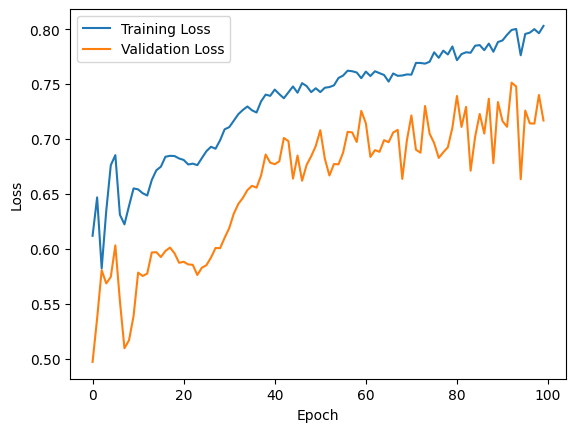

In [40]:
import deepchem as dc
import pandas as pd
import matplotlib.pyplot as plt

# ... (Ваш код для загрузки данных, подготовки, разделения и создания модели)

# Обучение модели с отслеживанием истории
losses = []
val_losses = []

for epoch in range(100):  # 100 эпох обучения
    model.fit(train_dataset, nb_epoch=1)  # Обучение модели на одной эпохе

    # Оценка на обучающей и валидационной выборках
    train_scores = model.evaluate(train_dataset, [dc.metrics.Metric(dc.metrics.roc_auc_score)], transformers=[])
    val_scores = model.evaluate(test_dataset, [dc.metrics.Metric(dc.metrics.roc_auc_score)], transformers=[])

    # Запись потерь
    losses.append(train_scores['roc_auc_score'])
    val_losses.append(val_scores['roc_auc_score'])

# Построение графиков обучения
plt.plot(losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [41]:
pip install --upgrade scikit-learn


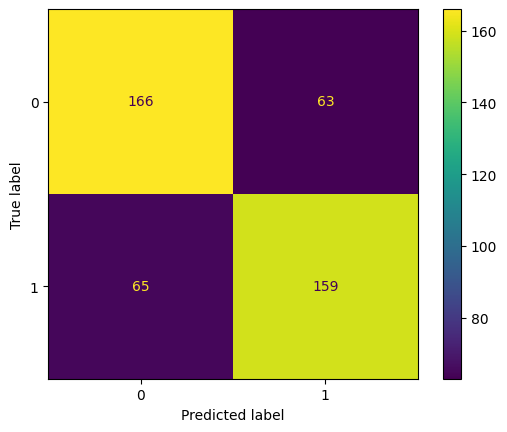

In [42]:
from sklearn import metrics
import matplotlib.pyplot as plt
dataset_pred = dc.data.NumpyDataset(X=train_dataset.X)
prediction= model.predict(dataset_pred)
classes = np.argmax(prediction, axis=2)

confusion_matrix = metrics.confusion_matrix(classes,train_dataset.y )

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()
#classes = np.argmax(prediction, axis=2)


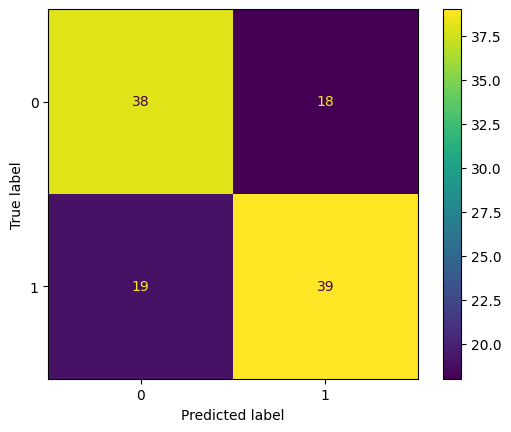

In [43]:
dataset_pred = dc.data.NumpyDataset(X=test_dataset.X)
prediction= model.predict(dataset_pred)
classes = np.argmax(prediction, axis=2)

confusion_matrix = metrics.confusion_matrix(classes,test_dataset.y )

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [44]:
import matplotlib.pyplot as plt
#6. Оценка модели
# Определение метрики
metric = dc.metrics.Metric(dc.metrics.roc_auc_score)

# Оценка на обучающей выборке
train_scores = model.evaluate(train_dataset, [metric], transformers=[])

# Оценка на тестовой выборке
test_scores = model.evaluate(test_dataset, [metric], transformers=[])

print(f'Train ROC AUC: {train_scores["roc_auc_score"]}')
print(f'Test ROC AUC: {test_scores["roc_auc_score"]}')

metric = dc.metrics.Metric(dc.metrics.recall_score)
test_scores = model.evaluate(test_dataset, [metric], transformers=[])
print(f'Test RECALL: {test_scores["recall_score"]}')

# metric = dc.metrics.Metric(dc.metrics.precision_score)
# test_scores = model.evaluate(test_dataset, [metric], transformers=[])
# print(f'Test PRECISION: {test_scores["precision_score"]}')

Train ROC AUC: 0.8029133029133029
Test ROC AUC: 0.7168359495229302
Test RECALL: 0.6842105263157895


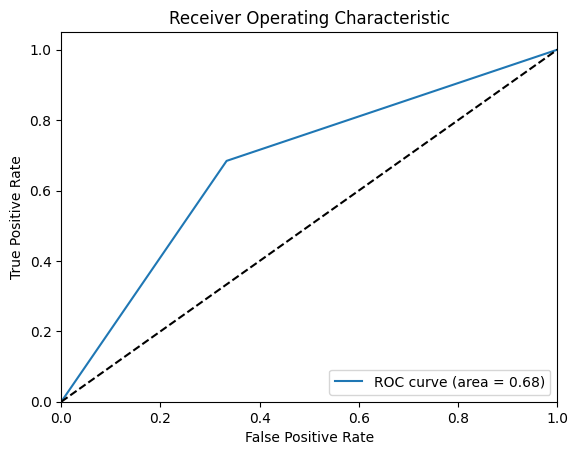

In [45]:
import deepchem as dc
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ... (Ваш код для загрузки данных, подготовки, разделения и создания модели)

# ... (Ваш код для обучения модели)

# Оценка на тестовой выборке
y_true = test_dataset.y
dataset_pred = dc.data.NumpyDataset(X=test_dataset.X)
y_pred = model.predict(dataset_pred) # Получаем вероятности для класса "1"
y_pred = np.argmax(y_pred, axis=2)

# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [46]:
for_class['Recommendation'] = 1
for_class = for_class.sample(frac=1)
for_class=for_class.reset_index(drop=True)
for_class

,molecule,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,#stars,...,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm,Recommendation
0,M-1-4ed-S,8.422192,31.58322,3.750000,526.387,3.0,0.0,43.37,FC(F)(F)c1cc(ccc1)\C=C\C(=O)c(c(F)c(F)c2)c(c23...,2.0,...,0.000,59.425,3.0,1.0,22.0,0.0,22.0,2.0,37.0,1
1,1037-DS-86-1,33.000000,43.90000,1.330303,555.035,6.0,2.0,93.81,c1cc(Cl)ccc1\C=C\C(=O)c(c(O)c(C)c2OC)c(c2[C@]3...,2.0,...,0.000,80.553,7.0,2.0,32.0,0.0,32.0,4.0,40.0,1
2,3859_KS-O-687,27.700000,300.00000,10.830325,671.778,7.0,0.0,112.52,c1ccccc1-c(cc2)ccc2-c(n3)cn(c34)c(cs4)COc5c(C)...,4.0,...,0.000,91.554,9.0,2.0,42.0,0.0,42.0,5.0,49.0,1
3,7597_ZV-125,300.000000,300.00000,1.000000,479.556,6.0,0.0,98.34,CCOC(=O)c1ccc(o1)CN(S(=O)(=O)c(cc2)ccc2C)c(ccc...,0.0,...,0.000,76.595,7.0,0.0,22.0,0.0,22.0,0.0,34.0,1
4,1626-AS-220-6,6.000000,32.50000,5.416667,208.303,2.0,0.0,26.30,C=CC(=O)O[C@H]1C[C@H](CC2)C(C)(C)[C@@]12C,2.0,...,0.000,27.598,2.0,0.0,0.0,0.0,0.0,0.0,15.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,CHEMBL4525896,32.226000,101.60100,3.152765,447.582,4.0,1.0,71.00,C[C@@]12C(C)(C)[C@H](CC2)CC\1=N/NC(=O)[C@@H]([...,0.0,...,26.199,73.206,6.0,0.0,23.0,0.0,23.0,11.0,33.0,1
419,CHEMBL660,0.303000,10.58800,34.943894,151.254,0.0,0.0,26.02,NC12C[C@@H]3C[C@H](C1)C[C@H](C2)C3,6.0,...,0.000,24.357,1.0,0.0,10.0,0.0,10.0,10.0,11.0,1
420,1563-Ya-371-13,8.400000,111.00000,13.214286,320.566,1.0,0.0,15.60,CCCCN(CCCC)CCC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,3.0,...,0.000,17.981,2.0,1.0,0.0,0.0,0.0,0.0,23.0,1
421,7584_ZV-090,95.000000,300.00000,3.157895,432.480,3.0,0.0,94.99,CCN1C(=O)C[C@@H](C1=O)[C@@H](c2c([C@@H]3C(=O)O...,0.0,...,0.000,112.717,7.0,0.0,24.0,0.0,24.0,7.0,32.0,1


In [47]:
df_for_train = pd.merge(df, for_class, on=df.columns.tolist (), how='outer')
df_for_train

,molecule,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,#stars,...,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm,Recommendation
0,1007-Ya-213,2.700,500.000,185.185185,195.307,2.0,1.0,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,2.0,...,0.000,35.245,2.0,0.0,0.0,0.0,0.0,0.0,14.0,NaN
1,1007-Ya-213,0.700,447.000,638.571429,195.307,2.0,1.0,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,2.0,...,0.000,35.245,2.0,0.0,0.0,0.0,0.0,0.0,14.0,NaN
2,1008-Ya-187,9.900,144.000,14.545455,250.431,1.0,0.0,15.60,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,2.0,...,0.000,17.981,2.0,0.0,0.0,0.0,0.0,0.0,18.0,1.0
3,1009-As-106,8.300,500.000,60.240964,222.377,1.0,0.0,15.60,CN(C)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,3.0,...,0.000,18.821,2.0,0.0,0.0,0.0,0.0,0.0,16.0,NaN
4,1010-Ya-208,39.400,143.000,3.629442,239.361,2.0,0.0,29.54,CN(C)CC(=O)O[C@H]1C[C@H](CC2)C(C)(C)[C@@]12C,1.0,...,0.000,36.035,3.0,0.0,0.0,0.0,0.0,0.0,17.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1564,CHEMBL5180810,2.984,33.711,11.297252,441.364,7.0,4.0,127.53,c1c(O)c(O)cc(c12)C[C@@H](C(=O)OC)N(C(=O)C(F)(F...,0.0,...,27.454,141.131,8.0,0.0,16.0,0.0,16.0,3.0,31.0,NaN
1565,CHEMBL5182912,2.964,38.739,13.069838,387.393,7.0,4.0,127.53,c1c(O)c(O)cc(c12)C[C@@H](C(=O)OC)N(C(=O)C)[C@H...,0.0,...,28.787,148.623,8.0,0.0,16.0,0.0,16.0,3.0,28.0,NaN
1566,CHEMBL5187879,2.628,37.336,14.207002,373.366,7.0,4.0,127.53,c1c(O)c(O)cc(c12)C[C@@H](C(=O)OC)N(C=O)[C@H]2C...,0.0,...,31.661,149.675,8.0,0.0,16.0,0.0,16.0,3.0,27.0,NaN
1567,CHEMBL5208658,7.187,35.933,4.999722,359.339,5.0,4.0,138.53,c1c(O)c(O)cc(c12)C[C@@H](C(=O)O)N(C=O)[C@H]2Cc...,0.0,...,25.418,166.916,8.0,0.0,16.0,0.0,16.0,3.0,26.0,NaN


In [48]:
df_for_train.loc[df_for_train['Recommendation'].isnull(), 'Recommendation'] = 0
df_for_train = pd.concat([df_for_train, df_for_train[df_for_train['Recommendation'] == 1]])


In [49]:
df_for_train = df_for_train.sample(frac=1)
df_for_train=df_for_train.reset_index(drop=True)
df_for_train

,molecule,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,#stars,...,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm,Recommendation
0,CHEMBL3785705,9.010,9.415,1.044950,450.490,9.0,3.0,143.50,O=c1oc(C)c(C)c(O2)c1[C@H](OC)[C@@H]([C@]23C)[C...,0.0,...,0.000,125.363,9.0,0.0,18.0,0.0,18.0,9.0,32.0,1.0
1,2363-Ya-cedr,5.000,26.900,5.380000,220.358,1.0,0.0,12.53,C[C@]12[C@H](O2)CC/C=C/CC/C=C\CC1(C)C,3.0,...,0.000,12.556,1.0,0.0,13.0,3.0,0.0,8.0,16.0,0.0
2,CHEMBL3289220,3.955,62.779,15.873325,627.791,5.0,3.0,134.07,c1ccccc1CNC(=O)C2(N(C(=O)[C@H](CC(=O)N)NC(=O)O...,2.0,...,43.482,123.223,10.0,1.0,24.0,0.0,24.0,5.0,46.0,0.0
3,7571_ZV-036,159.000,300.000,1.886792,286.399,1.0,1.0,56.59,c1ccccc1NC(=S)N(C2)C[C@H]([C@@]234)C[C@](O4)(C...,0.0,...,0.000,33.101,3.0,0.0,16.0,0.0,16.0,6.0,20.0,0.0
4,CHEMBL2011779,0.016,3.032,189.500000,360.906,3.0,3.0,100.80,C1[C@@H](O)CC(C)(C)C[C@@]1(C)CNc2cc(S(=O)(=O)N...,0.0,...,0.000,98.702,5.0,0.0,12.0,0.0,12.0,6.0,23.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,4219_PTC-19,167.000,300.000,1.796407,535.558,7.0,1.0,105.07,c1cc(F)c(F)cc1C(=O)/C=C\c2ccc(cc2)/C=N/Nc3nc(N...,2.0,...,0.000,104.696,10.0,1.0,30.0,0.0,30.0,8.0,39.0,0.0
2047,2228-AK-1,100.000,225.200,2.252000,233.357,2.0,1.0,21.59,C#CCOCC/N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,2.0,...,0.000,25.960,2.0,0.0,7.0,0.0,7.0,6.0,17.0,1.0
2048,CHEMBL503913,500.000,375.000,0.750000,594.531,15.0,9.0,249.20,OC[C@@H]1[C@@H](O)[C@H](O)[C@@H](O)[C@@H](O1)O...,9.0,...,0.000,249.389,15.0,3.0,28.0,0.0,28.0,10.0,42.0,1.0
2049,6281-IOS-LFC-ESh-782,20.000,300.000,15.000000,342.323,1.0,0.0,26.93,c1ccccc1C#Cc2c(C(F)(F)F)n(C)n(c2=O)-c3ccccc3,1.0,...,0.000,35.086,3.0,0.0,17.0,0.0,17.0,0.0,25.0,0.0


In [50]:
df_for_train.drop(["molecule"], axis= 1 , inplace= True)
df_for_train.isna().sum()

IC50, mmg/ml                  0
CC50-MDCK, mmg/ml             0
SI                            0
Molecular weight              0
Hydrogen bond acceptors       0
Hydrogen bond donors          0
Polar SA                      0
SMILES                        0
#stars                        0
#amine                        0
#amidine                      0
#acid                         0
#amide                        0
#rotor                        0
#rtvFG                        0
CNS                           0
mol_MW                        0
dipole                        0
SASA                          0
FOSA                          0
FISA                          0
PISA                          0
WPSA                          0
volume                        0
donorHB                       0
accptHB                       0
dip^2/V                       0
ACxDN^.5/SA                   0
glob                          0
QPpolrz                       0
QPlogPC16                     0
QPlogPoc

In [51]:
import deepchem as dc

featurizer = dc.feat.ConvMolFeaturizer()
features = featurizer.featurize(df_for_train['SMILES'])

In [52]:
from deepchem.feat import RDKitDescriptors
rdkit_featurizer = RDKitDescriptors()
rdkit_features = rdkit_featurizer.featurize(df_for_train['SMILES'])
rdkit_features

array([[ 2.78993736, -2.65210994,  2.61810066, ...,  0.        ,
         0.        ,  0.52810821],
       [ 2.59653264, -2.28485515,  2.53213235, ...,  0.        ,
         0.        ,  0.43905611],
       [ 2.49516739, -2.48131294,  2.33032887, ...,  0.        ,
         0.        ,  0.27655908],
       ...,
       [ 2.50045642, -2.45048648,  2.37690119, ...,  0.        ,
         0.        ,  0.15929071],
       [ 2.39443085, -2.11283627,  2.30722271, ...,  0.        ,
         0.        ,  0.6210119 ],
       [ 2.60314355, -2.59690839,  2.64147771, ...,  0.        ,
         0.        ,  0.76357161]])

In [53]:
da=pd.DataFrame(rdkit_features)
da

,0,1,2,3,4,5,6,7,8,9,...,198,199,200,201,202,203,204,205,206,207
0,2.789937,-2.652110,2.618101,-2.847769,6.134892,-0.316442,16.540631,9.452743,2.023197,1087.673379,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.528108
1,2.596533,-2.284855,2.532132,-2.315463,5.108284,0.155717,16.614997,9.739232,2.063176,300.556812,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.439056
2,2.495167,-2.481313,2.330329,-2.664985,5.958523,-0.154394,16.566763,9.825833,1.699826,1452.365704,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.276559
3,2.596669,-2.252557,2.524270,-2.378657,7.800510,-0.022881,32.092047,9.819009,1.476800,587.399486,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.633623
4,2.400142,-2.449813,2.456783,-2.415599,7.887726,-0.003171,35.495692,9.631497,2.157249,690.565805,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.769122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,2.202404,-2.296410,2.187144,-2.396486,6.063594,0.104231,19.159756,10.080798,1.238454,1319.736688,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.201569
2047,2.590648,-2.342395,2.634304,-2.323180,5.938439,0.174526,16.473014,9.700624,1.958926,363.608334,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.540220
2048,2.500456,-2.450486,2.376901,-2.637790,5.878425,-0.348494,16.740218,9.970808,1.451596,1471.117130,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.159291
2049,2.394431,-2.112836,2.307223,-2.207154,5.464424,-0.143687,19.413236,10.161049,2.250690,1004.298375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.621012


In [54]:
data=df_for_train
new_df=pd.concat([data,da],axis=1)
new_df.dropna(inplace=True,ignore_index=True)
data=new_df[['IC50, mmg/ml', 'CC50-MDCK, mmg/ml', 'SI', 'Molecular weight', 'Hydrogen bond acceptors', 'Hydrogen bond donors', 'Polar SA', '#stars', '#amine', '#amidine', '#acid', '#amide', '#rotor', '#rtvFG', 'CNS', 'mol_MW', 'dipole', 'SASA', 'FOSA', 'FISA', 'PISA', 'WPSA', 'volume', 'donorHB', 'accptHB', 'dip^2/V', 'ACxDN^.5/SA', 'glob', 'QPpolrz', 'QPlogPC16', 'QPlogPoct', 'QPlogPw', 'QPlogPo/w', 'QPlogS', 'CIQPlogS', 'QPlogHERG', 'QPPCaco', 'QPlogBB', 'QPPMDCK', 'QPlogKp', 'IP(eV)', 'EA(eV)', '#metab', 'QPlogKhsa', 'HumanOralAbsorption', 'PercentHumanOralAbsorption', 'SAfluorine', 'SAamideO', 'PSA', '#NandO', 'RuleOfFive', '#ringatoms', '#in34', '#in56', '#noncon', '#nonHatm']]
data.drop(columns=['IC50, mmg/ml', 'CC50-MDCK, mmg/ml', 'SI'], inplace = True)
data

<ipython-input-54-80e0a5e8f517>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['IC50, mmg/ml', 'CC50-MDCK, mmg/ml', 'SI'], inplace = True)


,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,#stars,#amine,#amidine,#acid,#amide,#rotor,...,SAfluorine,SAamideO,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm
0,450.490,9.0,3.0,143.50,0.0,0.0,0.0,0.0,0.0,4.0,...,0.000,0.000,125.363,9.0,0.0,18.0,0.0,18.0,9.0,32.0
1,220.358,1.0,0.0,12.53,3.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,12.556,1.0,0.0,13.0,3.0,0.0,8.0,16.0
2,627.791,5.0,3.0,134.07,2.0,1.0,0.0,0.0,3.0,13.0,...,0.000,43.482,123.223,10.0,1.0,24.0,0.0,24.0,5.0,46.0
3,286.399,1.0,1.0,56.59,0.0,0.0,0.0,0.0,0.0,1.0,...,0.000,0.000,33.101,3.0,0.0,16.0,0.0,16.0,6.0,20.0
4,360.906,3.0,3.0,100.80,0.0,0.0,0.0,0.0,0.0,6.0,...,0.000,0.000,98.702,5.0,0.0,12.0,0.0,12.0,6.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,535.558,7.0,1.0,105.07,2.0,0.0,0.0,0.0,0.0,8.0,...,88.788,0.000,104.696,10.0,1.0,30.0,0.0,30.0,8.0,39.0
2046,233.357,2.0,1.0,21.59,2.0,0.0,0.0,0.0,0.0,6.0,...,0.000,0.000,25.960,2.0,0.0,7.0,0.0,7.0,6.0,17.0
2047,594.531,15.0,9.0,249.20,9.0,0.0,0.0,0.0,0.0,14.0,...,0.000,0.000,249.389,15.0,3.0,28.0,0.0,28.0,10.0,42.0
2048,342.323,1.0,0.0,26.93,1.0,0.0,0.0,0.0,0.0,2.0,...,101.691,0.000,35.086,3.0,0.0,17.0,0.0,17.0,0.0,25.0


In [55]:
data.isna().sum().sum()


0

In [56]:
new_df['Recommendation'].value_counts()

Recommendation
0.0    1086
1.0     964
Name: count, dtype: int64

In [57]:
dataset = dc.data.NumpyDataset(X=data.values, y=new_df['Recommendation'])
# 3. Разделение данных
splitter = dc.splits.RandomSplitter()
train_dataset, test_dataset = splitter.train_test_split(dataset)

In [58]:
model = dc.models.MultitaskClassifier(
    n_tasks=1,  # Одна задача - бинарная классификация
    n_features=data.shape[1],
    layer_sizes=[100, 50],
    dropouts=[0.2, 0.2],
    mode='classification'
)

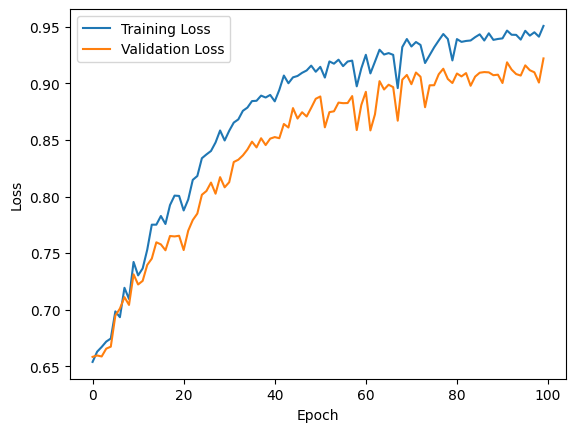

In [59]:
import deepchem as dc
import pandas as pd
import matplotlib.pyplot as plt

# ... (Ваш код для загрузки данных, подготовки, разделения и создания модели)

# Обучение модели с отслеживанием истории
losses = []
val_losses = []

for epoch in range(100):  # 100 эпох обучения
    model.fit(train_dataset, nb_epoch=1)  # Обучение модели на одной эпохе

    # Оценка на обучающей и валидационной выборках
    train_scores = model.evaluate(train_dataset, [dc.metrics.Metric(dc.metrics.roc_auc_score)], transformers=[])
    val_scores = model.evaluate(test_dataset, [dc.metrics.Metric(dc.metrics.roc_auc_score)], transformers=[])

    # Запись потерь
    losses.append(train_scores['roc_auc_score'])
    val_losses.append(val_scores['roc_auc_score'])

# Построение графиков обучения
plt.plot(losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

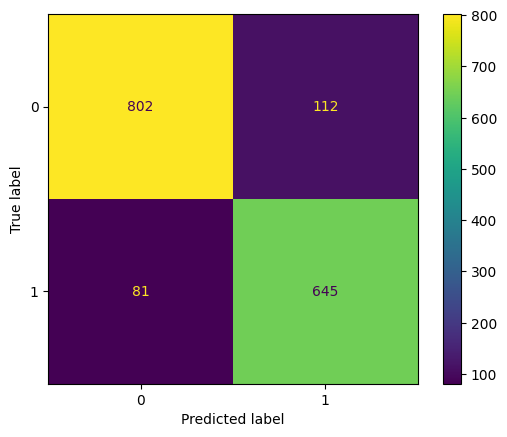

In [60]:
from sklearn import metrics
import matplotlib.pyplot as plt
dataset_pred = dc.data.NumpyDataset(X=train_dataset.X)
prediction= model.predict(dataset_pred)
classes = np.argmax(prediction, axis=2)

confusion_matrix = metrics.confusion_matrix(classes,train_dataset.y )

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()
#classes = np.argmax(prediction, axis=2)

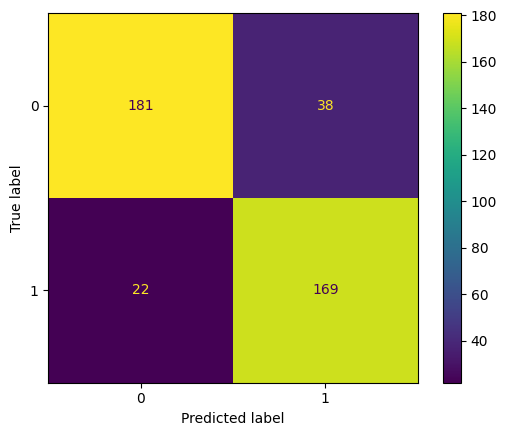

In [61]:
dataset_pred = dc.data.NumpyDataset(X=test_dataset.X)
prediction= model.predict(dataset_pred)
classes = np.argmax(prediction, axis=2)

confusion_matrix = metrics.confusion_matrix(classes,test_dataset.y )

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [62]:
import matplotlib.pyplot as plt
#6. Оценка модели
# Определение метрики
metric = dc.metrics.Metric(dc.metrics.roc_auc_score)

# Оценка на обучающей выборке
train_scores = model.evaluate(train_dataset, [metric], transformers=[])

# Оценка на тестовой выборке
test_scores = model.evaluate(test_dataset, [metric], transformers=[])

print(f'Train ROC AUC: {train_scores["roc_auc_score"]}')
print(f'Test ROC AUC: {test_scores["roc_auc_score"]}')

metric = dc.metrics.Metric(dc.metrics.recall_score)
test_scores = model.evaluate(test_dataset, [metric], transformers=[])
print(f'Test RECALL: {test_scores["recall_score"]}')

# metric = dc.metrics.Metric(dc.metrics.precision_score)
# test_scores = model.evaluate(test_dataset, [metric], transformers=[])
# print(f'Test PRECISION: {test_scores["precision_score"]}')

Train ROC AUC: 0.9506680569871835
Test ROC AUC: 0.9219675876347541
Test RECALL: 0.8164251207729468


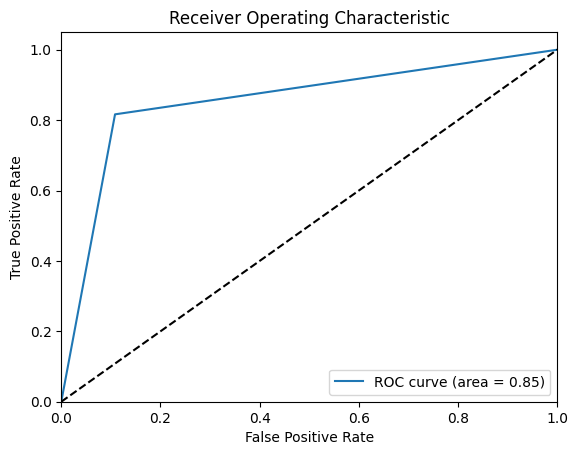

In [63]:
import deepchem as dc
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ... (Ваш код для загрузки данных, подготовки, разделения и создания модели)

# ... (Ваш код для обучения модели)

# Оценка на тестовой выборке
y_true = test_dataset.y
dataset_pred = dc.data.NumpyDataset(X=test_dataset.X)
y_pred = model.predict(dataset_pred) # Получаем вероятности для класса "1"
y_pred = np.argmax(y_pred, axis=2)

# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [64]:
!pip install catboost

In [65]:
from catboost import CatBoostRegressor

In [66]:
data = df_for_train
SMILES = np.array(new_df['SMILES'])

In [67]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
def create_features(smiles_list, radius=3, nBits=2048):
    features = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits)
        features.append(list(fp.ToBitString()))
    return pd.DataFrame(features)


In [68]:
data = pd.concat([data,create_features(SMILES), da],axis=1)

In [69]:
data=new_df.drop(columns=['IC50, mmg/ml', 'CC50-MDCK, mmg/ml', 'SI', 'SMILES'])

In [70]:
data

,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,#stars,#amine,#amidine,#acid,#amide,#rotor,...,198,199,200,201,202,203,204,205,206,207
0,450.490,9.0,3.0,143.50,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.528108
1,220.358,1.0,0.0,12.53,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.439056
2,627.791,5.0,3.0,134.07,2.0,1.0,0.0,0.0,3.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.276559
3,286.399,1.0,1.0,56.59,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.633623
4,360.906,3.0,3.0,100.80,0.0,0.0,0.0,0.0,0.0,6.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.769122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,535.558,7.0,1.0,105.07,2.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.201569
2046,233.357,2.0,1.0,21.59,2.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.540220
2047,594.531,15.0,9.0,249.20,9.0,0.0,0.0,0.0,0.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.159291
2048,342.323,1.0,0.0,26.93,1.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.621012


In [71]:
data = data.interpolate()

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Columns: 262 entries, Molecular weight to 207
dtypes: float64(262)
memory usage: 4.1 MB


In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [74]:
# Вычисление корреляции между каждой переменной и целевой переменной
correlations = data.corrwith(new_df['SI'])
# print(correlations)
# Выбор переменных с наибольшей корреляцией
selected_features = correlations[abs(correlations) > 0.07].index
# print(selected_features)
# Применение выбранных признаков к тестовой выборке
data = data[selected_features]
data

,#amine,#acid,#amide,CNS,donorHB,QPlogPw,QPlogPo/w,QPlogHERG,QPPCaco,QPlogKp,...,69,86,94,104,105,116,122,130,131,138
0,0.0,0.0,0.0,-1.0,2.0,15.274,1.442,-3.534,568.522,-3.480,...,1.0,25.011977,76.974330,14.325937,31.098277,-8.273122,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,2.925,2.531,-2.395,9906.038,-1.420,...,0.0,0.000000,64.580337,4.736863,5.414990,0.362555,0.0,0.0,0.0,0.0
2,1.0,0.0,3.0,-2.0,3.0,22.489,3.455,-4.453,77.287,-2.760,...,12.0,32.723782,76.849763,38.754744,0.000000,6.339588,0.0,0.0,0.0,2.0
3,0.0,0.0,0.0,2.0,1.0,7.340,3.975,-4.937,7142.604,-0.766,...,1.0,18.150049,24.546660,4.736863,5.917906,0.904967,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,-2.0,4.0,14.691,1.630,-4.525,121.241,-4.408,...,4.0,17.254776,51.033126,10.023291,10.829981,0.611114,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,0.0,0.0,0.0,-1.0,1.0,15.904,4.313,-7.075,1641.139,-1.210,...,8.0,31.742477,0.000000,9.473726,11.634442,4.555312,0.0,0.0,0.0,1.0
2046,0.0,0.0,0.0,1.0,0.5,3.595,3.545,-4.103,6490.169,-1.065,...,4.0,11.126675,40.033676,4.736863,29.091671,2.164824,0.0,0.0,0.0,0.0
2047,0.0,0.0,0.0,-2.0,8.0,34.258,-2.180,-6.277,1.332,-6.860,...,6.0,17.696186,68.335522,14.210589,0.000000,-0.873844,0.0,0.0,0.0,0.0
2048,0.0,0.0,0.0,1.0,0.0,7.984,4.863,-6.856,3658.025,-0.668,...,1.0,12.611123,6.176299,13.223971,11.840869,-1.559865,0.0,0.0,0.0,0.0


In [75]:
X = data.values
y = new_df['SI']
# 3. Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [76]:
model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=8, l2_leaf_reg = 5, random_strength = 3, random_seed = 44)

In [77]:
# from sklearn.model_selection import GridSearchCV

# model = CatBoostRegressor()
# parameters = {'depth' : [6,8,10],
#               'learning_rate' : [0.01, 0.05, 0.1, 0.2],
#               'iterations'    : [600, 800, 1000],
#             #   'loss_function': ['MAE', 'RMSE'],
#             #   'l2_leaf_reg': [1, 2, 3, 4, 5, 6],
#             #   'random_strength': [1, 2, 3, 4]
#               }

# grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
# grid.fit(X_train, y_train)

In [78]:
model.fit(X_train, y_train)

0:	learn: 1039.3934802	total: 82.5ms	remaining: 1m 22s
1:	learn: 1014.1860100	total: 112ms	remaining: 56s
2:	learn: 993.0054302	total: 128ms	remaining: 42.6s
3:	learn: 973.0709869	total: 145ms	remaining: 36.2s
4:	learn: 952.9859990	total: 157ms	remaining: 31.2s
5:	learn: 943.2749842	total: 169ms	remaining: 28.1s
6:	learn: 926.0055349	total: 181ms	remaining: 25.7s
7:	learn: 912.1682280	total: 193ms	remaining: 23.9s
8:	learn: 902.1091490	total: 206ms	remaining: 22.6s
9:	learn: 893.6060137	total: 219ms	remaining: 21.7s
10:	learn: 885.8321347	total: 232ms	remaining: 20.9s
11:	learn: 877.4866398	total: 244ms	remaining: 20.1s
12:	learn: 866.5594667	total: 256ms	remaining: 19.4s
13:	learn: 859.6060880	total: 270ms	remaining: 19s
14:	learn: 854.5674232	total: 284ms	remaining: 18.6s
15:	learn: 845.7338530	total: 295ms	remaining: 18.2s
16:	learn: 837.0714924	total: 307ms	remaining: 17.7s
17:	learn: 831.2242643	total: 318ms	remaining: 17.4s
18:	learn: 825.9950294	total: 330ms	remaining: 17s
19:	l

In [79]:
predictions = model.predict(X_test)

In [80]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [81]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

MAE: 92.6243303435405
MSE: 117492.39488377298
R^2: 0.9122123141596863


In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Создание и обучение модели
regressor = RandomForestRegressor(n_estimators=150, max_depth=8, random_state=12)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
regressor.fit(X_train, y_train)


RandomForestRegressor(max_depth=8, n_estimators=150, random_state=12)

In [83]:
# Прогнозирование на тестовой выборке
y_pred = regressor.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

MAE: 126.84134065306041
MSE: 319044.016403836
R^2: 0.761617456951164


In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание конвейера для предобработки данных и обучения модели
pipeline = make_pipeline(
    PolynomialFeatures(degree=2),  # Создание полиномиальных признаков (степень 2)
    StandardScaler(),  # Масштабирование признаков
    Ridge()  # Модель Ridge регрессии с регуляризацией
)

# Определение сетки гиперпараметров для GridSearchCV
param_grid = {
    'polynomialfeatures__degree': [2, 3, 4],  # Степени полинома для PolynomialFeatures
    'ridge__alpha': [0.1, 1, 10, 100]  # Параметр регуляризации alpha для Ridge
}

# Создание объекта GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Обучение модели с кросс-валидацией и поиском лучших гиперпараметров
grid_search.fit(X_train, y_train)

# Вывод лучших гиперпараметров
print("Лучшие гиперпараметры:", grid_search.best_params_)

# Предсказание на тестовой выборке
y_pred = grid_search.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Среднеквадратичная ошибка:", mse)
print('Абсолютная ошибка: ', mae)
print('r^2: ', r2)

Лучшие гиперпараметры: {'polynomialfeatures__degree': 2, 'ridge__alpha': 1}
Среднеквадратичная ошибка: 700466.4464762324
Абсолютная ошибка:  313.4180232538356
r^2:  0.28139335972596013


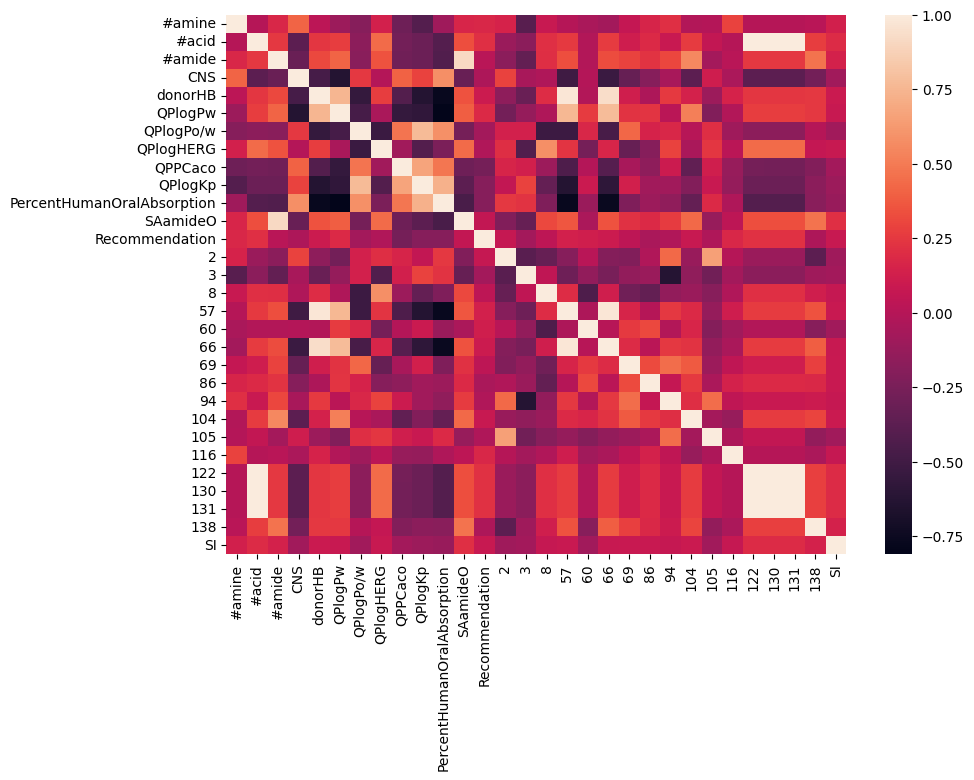

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
dataplot = sns.heatmap(pd.concat([data, y], axis=1).corr())
plt.show()

In [86]:
# Строим pairplot
sns.pairplot(pd.concat([data, y], axis=1))

# Показываем plot
plt.show()

Output hidden; open in https://colab.research.google.com to view.

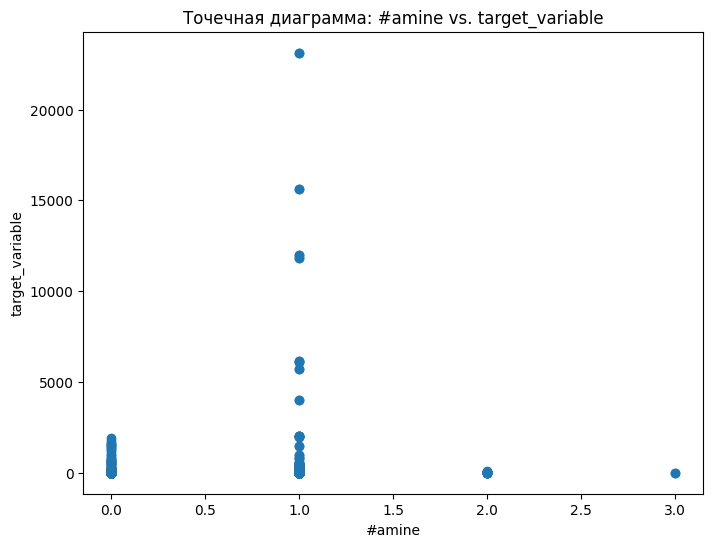

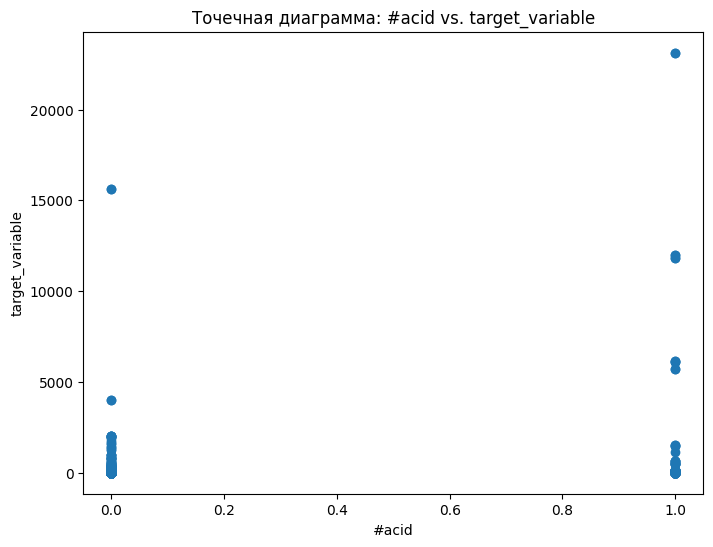

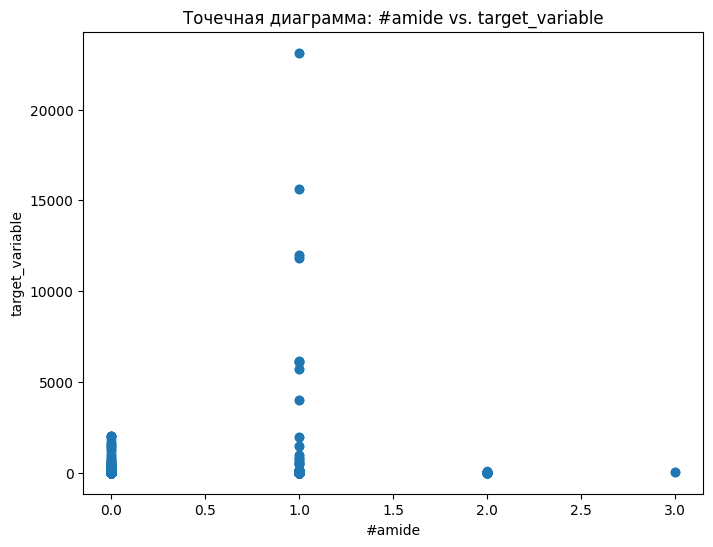

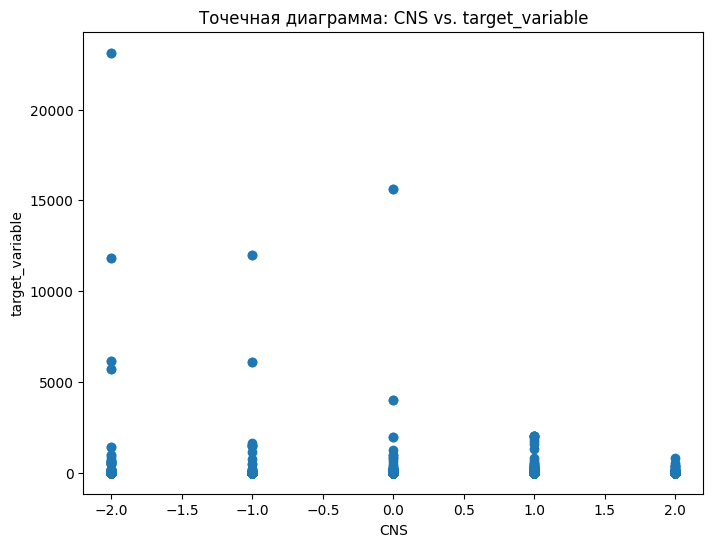

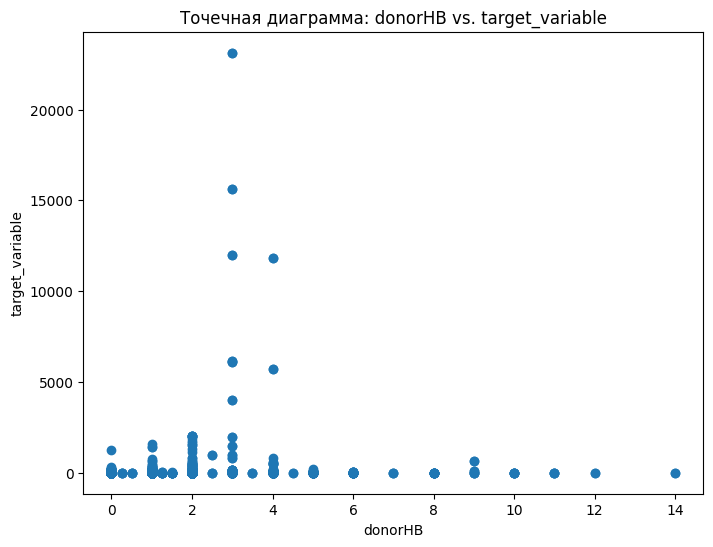

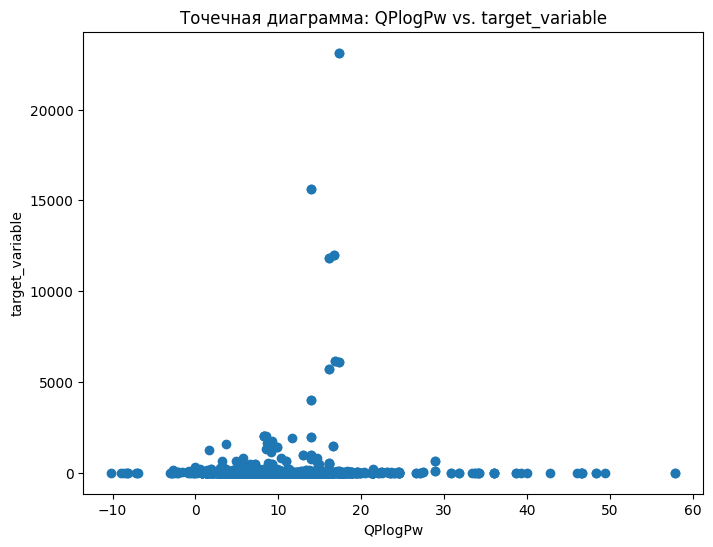

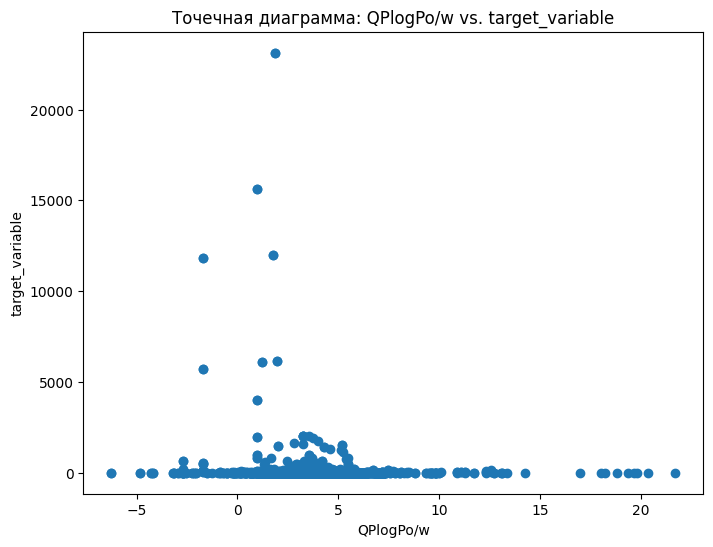

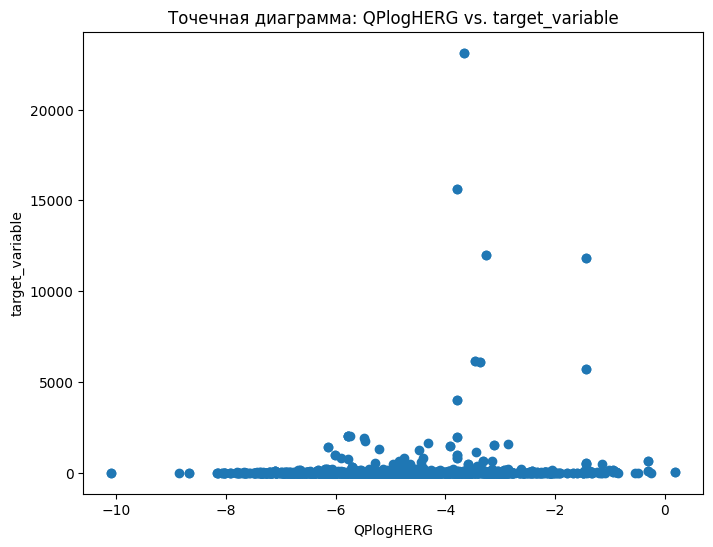

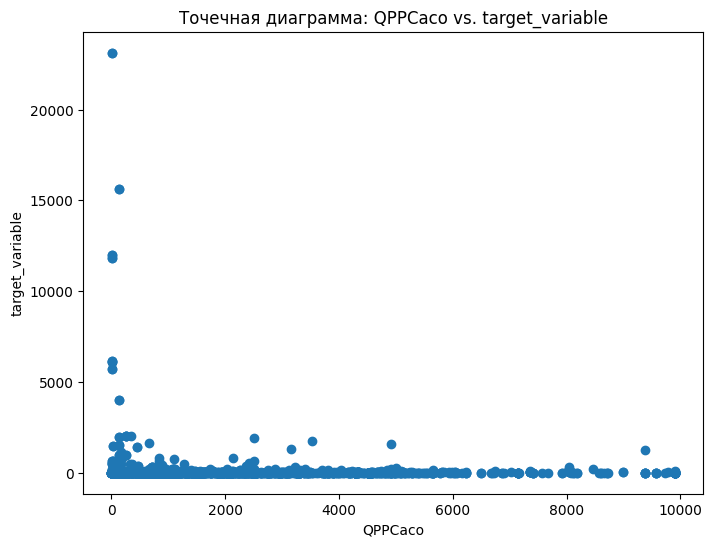

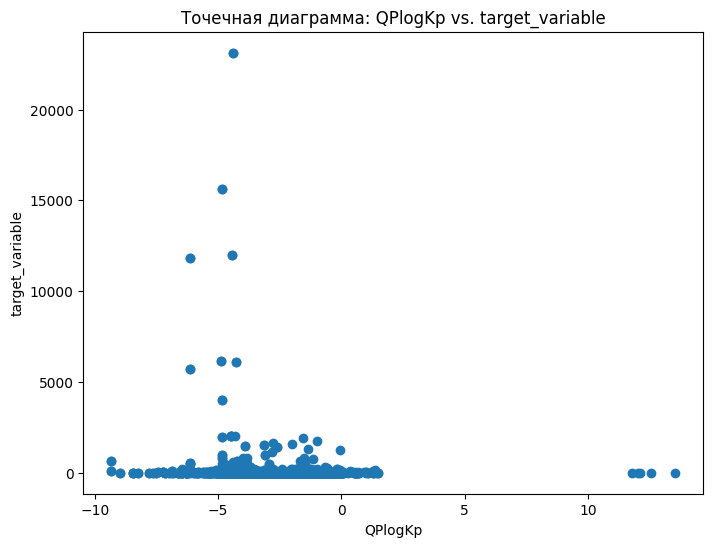

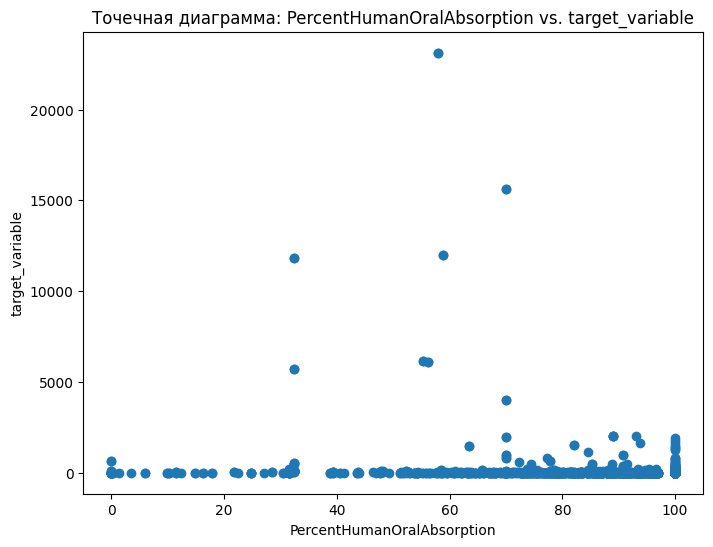

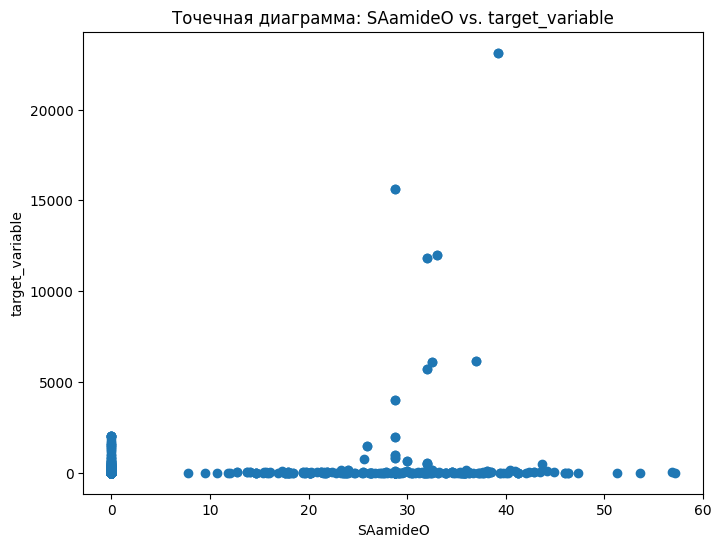

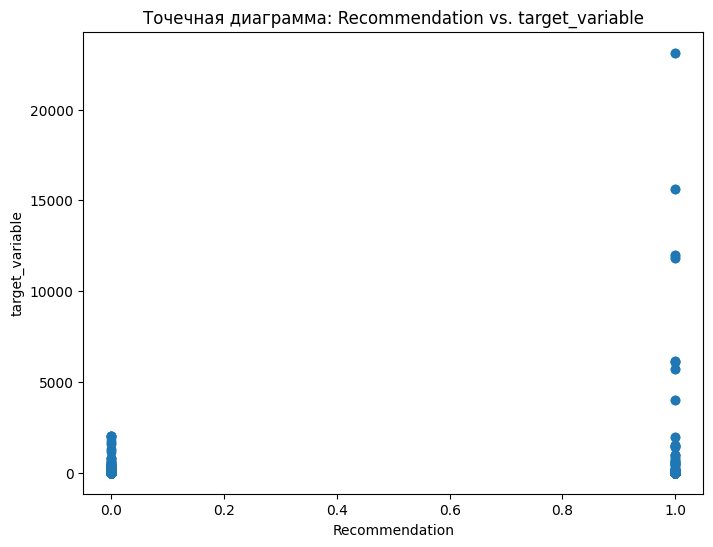

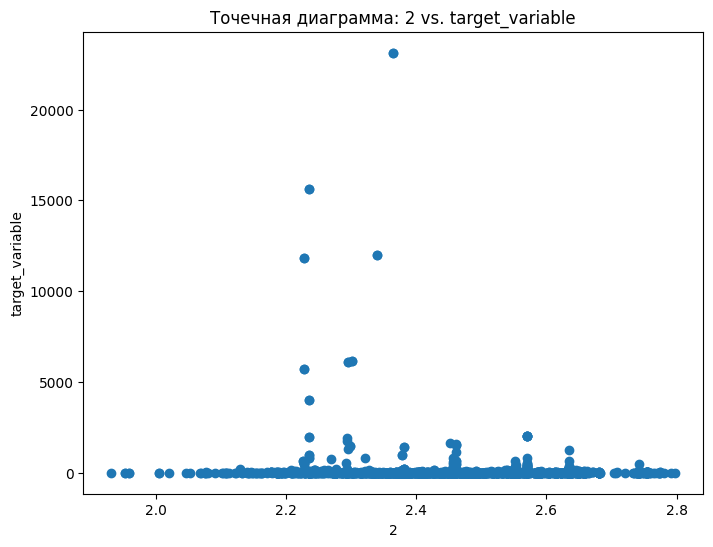

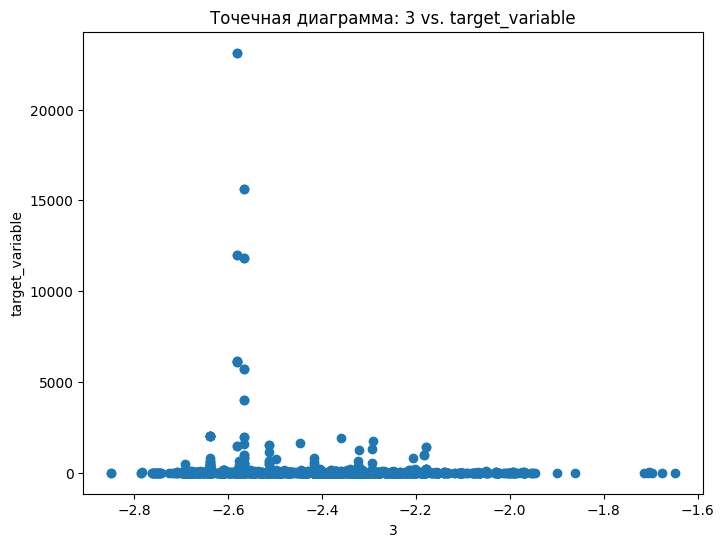

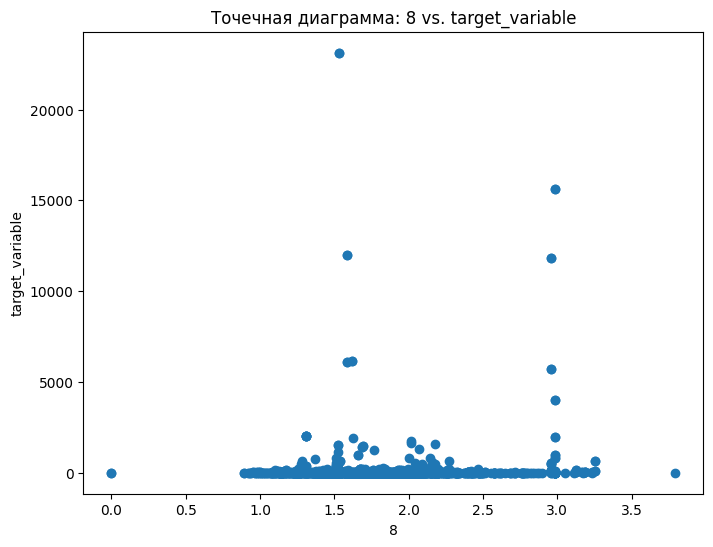

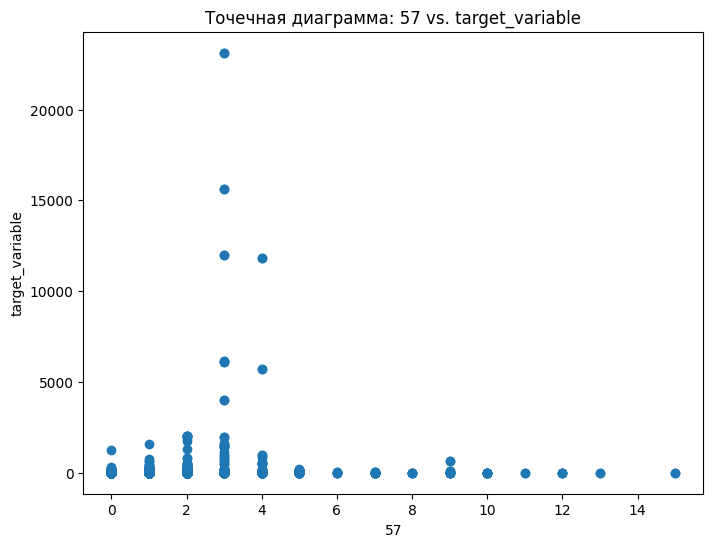

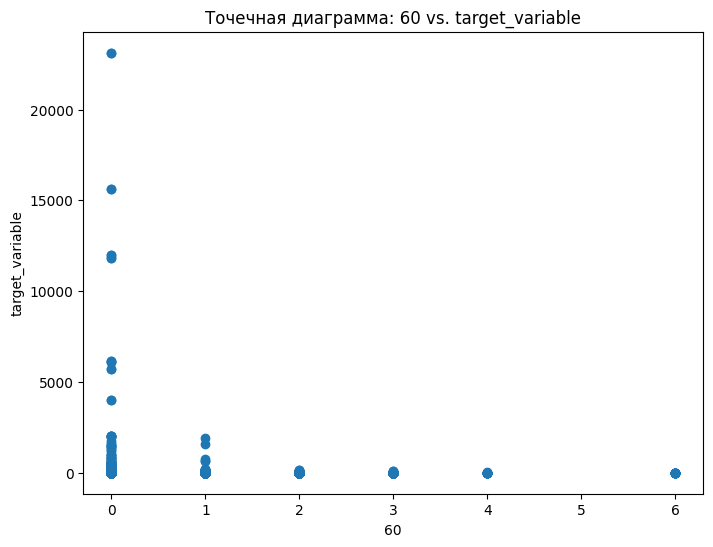

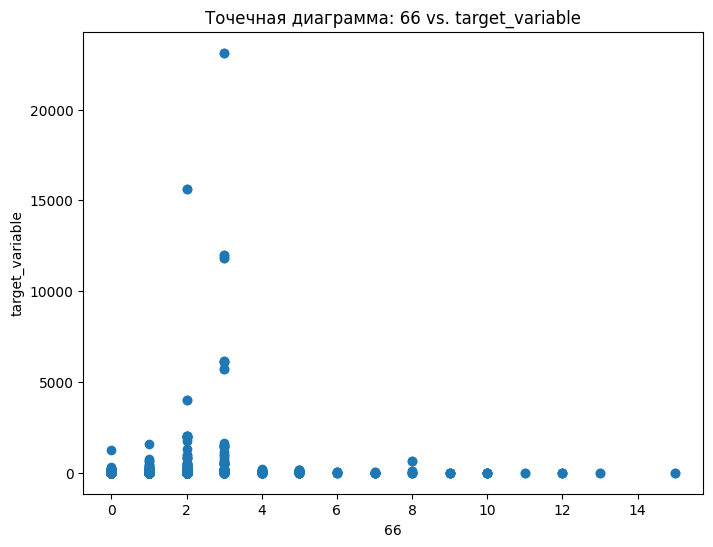

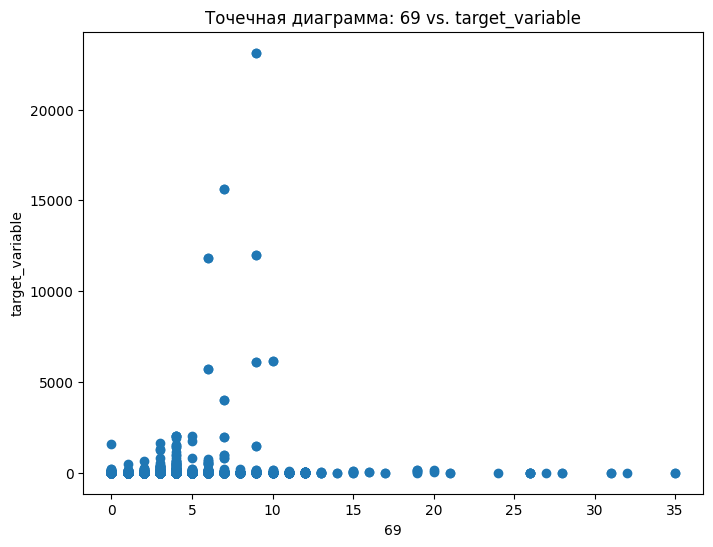

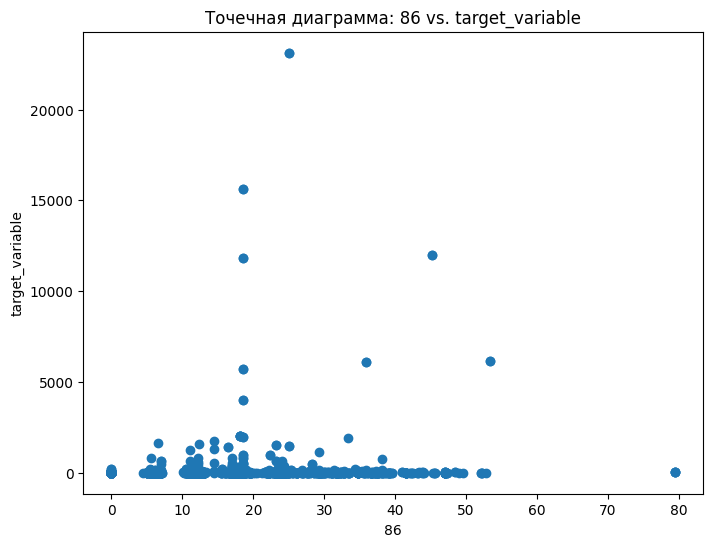

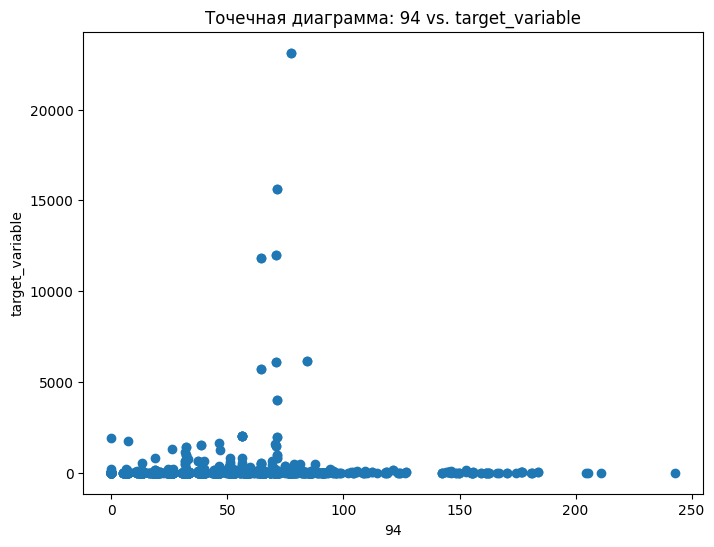

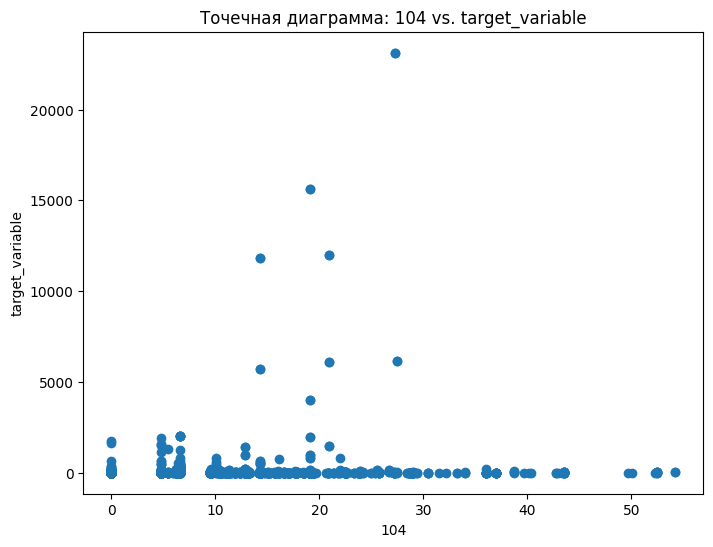

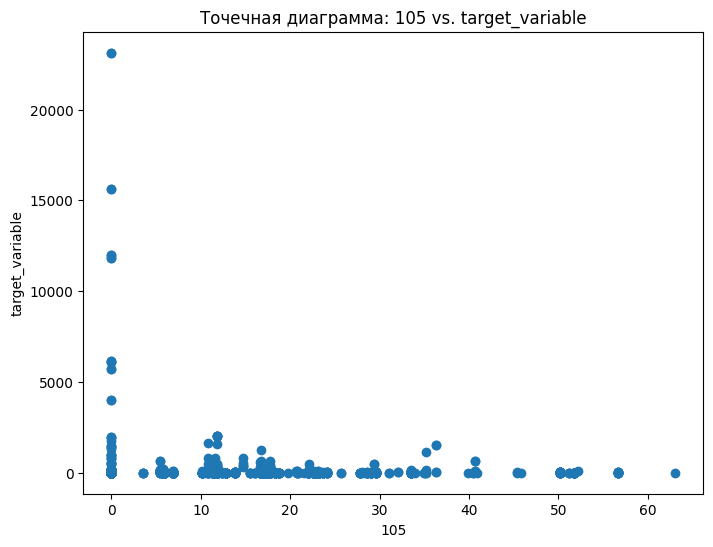

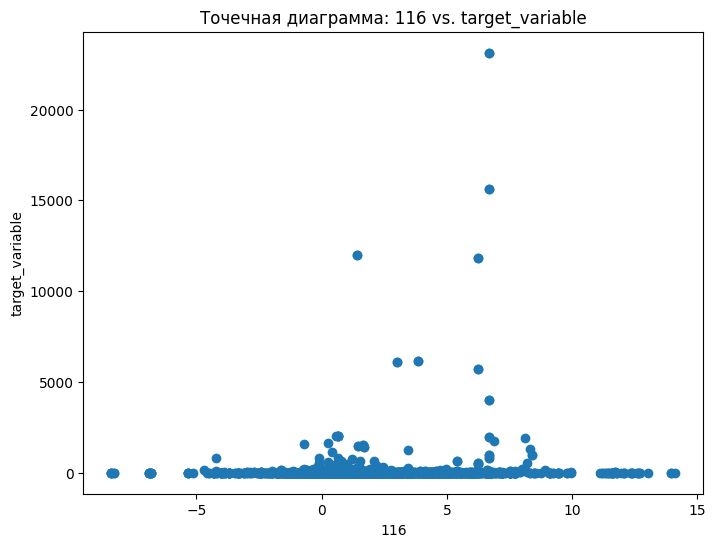

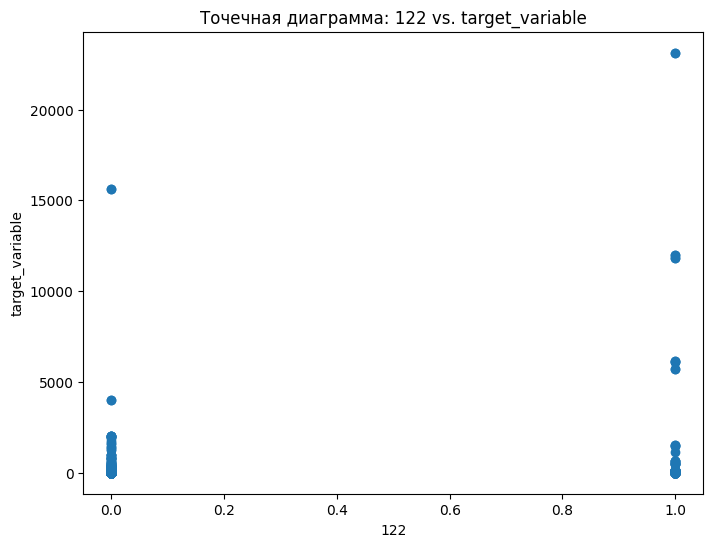

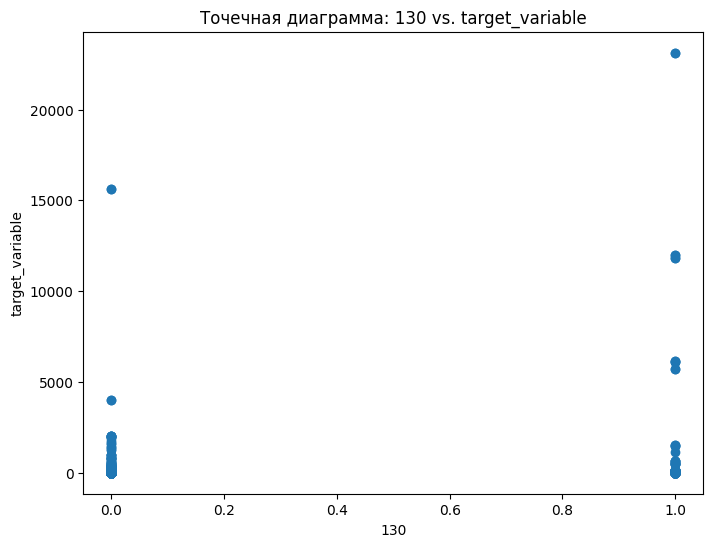

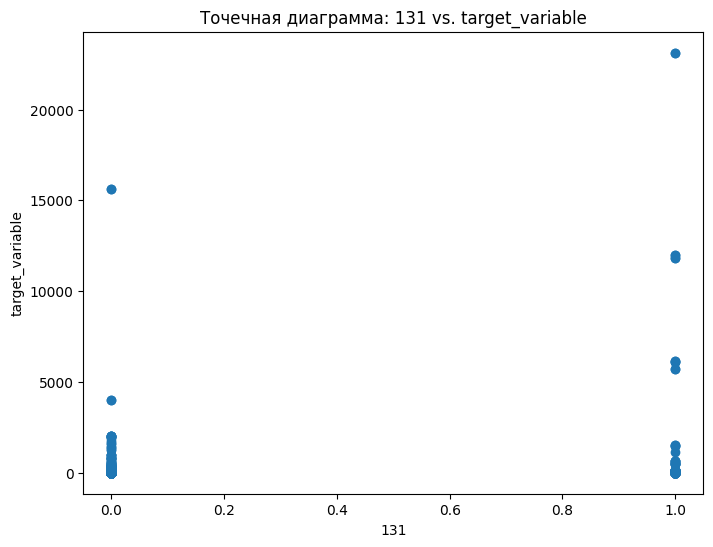

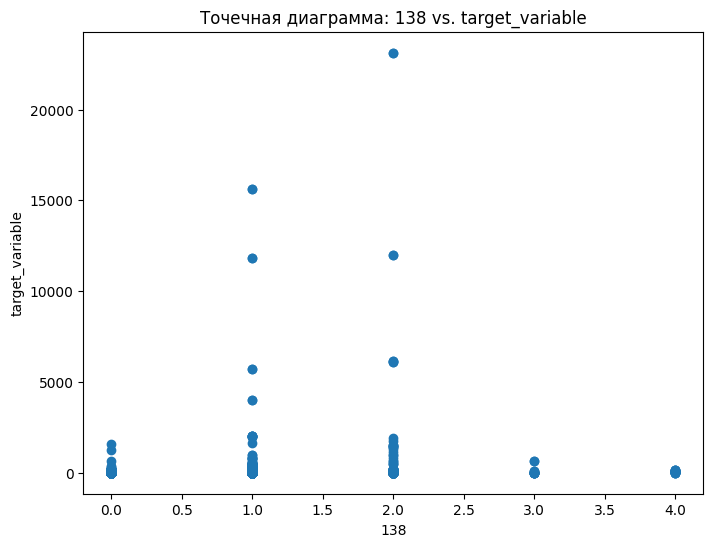

In [87]:
for feature in data.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(data[feature], y)
    plt.xlabel(feature)
    plt.ylabel('target_variable')
    plt.title(f'Точечная диаграмма: {feature} vs. target_variable')
    plt.show()

In [88]:
# from sklearn.decomposition import PCA
# # Создаем экземпляр PCA
# pca = PCA(n_components=10)

# # Применяем PCA к данным
# data = pd.DataFrame(pca.fit_transform(data))

In [89]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# dataplot = sns.heatmap(pd.concat([data, y], axis=1).corr())
# plt.show()